In [1]:
import osmnx as ox
import networkx as nx
import pandas as pd
import geopandas as gpd
import shapely
import rasterio as rio
import libpysal
from shapely.geometry import Point, LineString, Polygon, MultiLineString
from rasterio.mask import mask
from rasterio.warp import calculate_default_transform, reproject, Resampling
import numpy as np
import pycountry
from wpgpDownload.utils.wpcsv import Product
from wpgpDownload.utils.convenience_functions import refresh_csv
#refresh_csv()
from wpgpDownload.utils.convenience_functions import download_country_covariates as dl
import requests
from pyproj import CRS
import rasterstats
from rasterstats import zonal_stats
from shapely.validation import make_valid
import pysheds
from pysheds.grid import Grid
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from shapely import wkt
from shapely import ops
from shapely import geometry
from rasterio.plot import show_hist, show
import jenkspy
from jenkspy import JenksNaturalBreaks
from jenkspy import jenks_breaks
from shapely.geometry import mapping
from rasterio.features import rasterize
from scipy.ndimage import distance_transform_edt
from affine import Affine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from osgeo import gdal
import glob
import os
import pandas as pd
import geopandas as gpd
import numpy as np
from osgeo import ogr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
import pyspatialml as pml
import rasterio as rio
from pyspatialml import Raster
from rasterio import features
from rasterio.mask import mask
import matplotlib as mpl
from tempfile import NamedTemporaryFile
from pyspatialml.preprocessing import xy_coordinates, distance_to_corners
from skopt import BayesSearchCV
from skopt.space import Categorical, Integer, Real

# Set directory path
directory = 'C:/Users/Danny/Desktop/EMMA/IV'
os.chdir(directory)
# define study area according to OSM Nominatim (comma-seperated strings for
# several selection)s: https://nominatim.openstreetmap.org/ui/search.html
study_area = (["Myagdi, Nepal", "Baglung, Provinz Gandaki, Nepal", "Kushma, Nepal", "Jaljala, Nepal", "Thasang, Nepal", "Gharapjhong, Nepal"])

# SET INPUT PATHS
dem_path = 'C:/Users/Danny/Desktop/EMMA/IV/Data/DEM/ASTGTMV003_NEPAL.tif'
profile_curvature_path = 'C:/Users/Danny/Desktop/EMMA/IV/Data/DEM/profile_curvature.tif'
plan_curvature_path = 'C:/Users/Danny/Desktop/EMMA/IV/Data/DEM/plan_curvature.tif'
vrm_path = 'C:/Users/Danny/Desktop/EMMA/IV/Data/DEM/vrm.tif'
clay_path = 'C:/Users/Danny/Desktop/EMMA/IV/Data/parentsoil/clay.tif'
sand_path = 'C:/Users/Danny/Desktop/EMMA/IV/Data/parentsoil/sand.tif'
soil_parent_path = 'C:/Users/Danny/Desktop/EMMA/IV/Data/parentsoil/soilparent.tif'
geology_path = 'C:/Users/Danny/Desktop/EMMA/IV/Data/Geology_of_Nepal/geology.tif'
prec_path = 'C:/Users/Danny/Desktop/EMMA/IV/Data/Precipitation/Annual_Precip/max_annual_precipitation.tif'
pop_path = 'C:/Users/Danny/Desktop/EMMA/IV/Data/npl_ppp_2020.tif'
lc_path = 'C:/Users/Danny/Desktop/EMMA/IV/Data/Land_cover/ESA_WorldCover_10m_2021_v200_Nepal.tif'
ndvi_path = 'C:/Users/Danny/Desktop/EMMA/IV/Data/NDVI/NDVI_Nepal.tif'
rf_csv = 'C:/Users/Danny/Desktop/EMMA/IV/Data/rf_training_data.csv'
su_himalaya = 'C:/Users/Danny/Desktop/EMMA/IV/Data/Landslide_inventory/su_himalaya.gpkg'

# Create the new folder
os.makedirs('temporary')
os.makedirs('output')
os.makedirs('output/Landslide_variables')

# SET TEMPORARY FILE PATHS - CAN BE DELETED AFTERWARDS
#dem_proj_tif = '/temporary/ASTGTMV003_NEPAL_reproj.tif'
#dem_temp = '/temporary/ASTGTMV003_temporary.tif'
#scs_path = '/temporary/scs_classes.tif'
#scs_proj_tif = '/temporary/scs_classes1.tif'
#scs_temp = '/temporary/scs_classes2.tif'
#scs_file_res = '/temporary/scs_classes3.tif'
#slope_file = '/temporary/slope_classes.tif'
#geology_proj_tif = '/temporary/geology_reproj.tif'
#geology_temp = '/temporary/geology_reproj_clip.tif'
#geology_file_res = '/temporary/geology_reproj_clip_res.tif'
#ndvi_proj_tif = '/temporary/NDVI_reproj.tif'
#ndvi_temp = '/temporary/NDVI_proj_clip.tif'
#flow_acc_file = '/temporary/flow_acc_classes.tif'
#dem_file = '/temporary/dem_classes.tif'
#prec_proj_tif = '/temporary/max_annual_precipitation_proj.tif'
#prec_temp = '/temporary/max_annual_precipitation_proj_clip.tif'
#precipitation_file = '/temporary/precipitation_classes.tif'
#distance_river_path = '/temporary/distance.tif'
#distance_river_proj_tif = '/temporary/distance_proj.tif'
#distance_river_temp = '/temporary/distance_temp.tif'
#distance_river_file = '/temporary/distance_river_classes2.tif'
#landcover_path = '/temporary/ESA_WorldCover_10m_2021_v200_Nepal_clipped_reproj.tif'
#landcover_file = '/temporary/landcover_classes.tif'
#landcover_file_res = '/temporary/landcover_classes_res.tif'
#landcover_file_temp = '/temporary/landcover_classes_temp.tif'
#soil_parent_proj_tif = '/temporary/_proj.tif'
#soil_parent_temp = '/temporary/_proj_clip.tif'
#soil_parent_file_res = '/temporary/_proj_clip_res.tif'
#profile_curvature_proj_tif = '/temporary/profile_curvature_proj.tif'
#profile_curvature_temp = '/temporary/profile_curvature_proj_clip.tif'
#plan_curvature_proj_tif = '/temporary/plan_curvature_proj.tif'
#plan_curvature_temp = '/temporary/plan_curvature_proj_clip.tif'
#aspect_path = '/temporary/aspect.tif'
#vrm_proj_tif = '/temporary/vrm_proj.tif'
#vrm_temp = '/temporary/vrm_proj_clip.tif'


# SET OUTPUT FILE PATHS
#dem_temp_aoi = '/output/Landslide_variables/01_dem.tif'
#slope_file_perc = '/output/Landslide_variables/02_slope.tif'
#tpi_path = '/output/Landslide_variables/03_tpi.tif'
#profile_curvature_file_res = '/output/Landslide_variables/04_profile_curvature.tif'
#plan_curvature_file_res = '/output/Landslide_variables/05_plan_curvature.tif'
#vrm_file_res = '/output/Landslide_variables/06_vrm.tif'
#ndvi_file_res = '/output/Landslide_variables/07_ndvi.tif'
#prec_file_res = '/output/Landslide_variables/08_prec.tif'
#distance_river_files = '/output/Landslide_variables/09_distance_river.tif'
#aspect_path_res = '/output/Landslide_variables/10_aspect_encoded.tif'
#land_cover_encoded = '/output/Landslide_variables/11_landcover_encoded.tif'
#geology_encoded = '/output/Landslide_variables/12_geology_encoded.tif'
#soilparent_encoded = '/output/Landslide_variables/13_soilparent_encoded.tif'
#out_img = '/output/stack.tif'
#landslide_hazard_map

In [2]:
# %% >>> SOCIO-ECONOMIC IMPORTANCE
# fetch whole network for defined study area
network_graph = ox.graph_from_place(study_area,
                                    network_type="drive",
                                    buffer_dist=2000,
                                    clean_periphery=True)

# project the data
network_graph_proj = ox.project_graph(network_graph)
nodes_all, edges_all = ox.graph_to_gdfs(network_graph_proj,
                                        nodes=True,
                                        edges=True)
project_crs = nodes_all.crs

In [3]:
# Define the highway types to exclude
highway_types = ['motorway', 'trunk', 'primary']
# Filter edges_all for the defined types and all remaining
edges_study = edges_all[edges_all['highway'].isin(highway_types)]
edges_remaining = edges_all[~edges_all['highway'].isin(highway_types)]

In [4]:
# union all strings of edges_study  
edges_study_lines = []
edges_study_union = edges_study.unary_union
edges_study_union = shapely.ops.linemerge(edges_study_union)

d = {'geometry': [edges_study_union]}
edges_study_union = gpd.GeoDataFrame(d, crs=project_crs)

In [5]:
# create spatial weights matrix
W = libpysal.weights.Queen.from_dataframe(edges_remaining)
# get component labels
components = W.component_labels
edges_remaining = edges_remaining.dissolve(by=components)

C:\Users\Danny\AppData\Local\Programs\Python\Python310\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 46 disconnected components.
  warnings.warn(message)


In [6]:
# %% define cut-function
def cut(line, distance):
    # Cuts a line in two at a distance from its starting point
    if distance <= 0.0 or distance >= line.length:
        return [LineString(line)]
    coords = list(line.coords)
    for i, p in enumerate(coords):
        pd = line.project(Point(p))
        if pd == distance:
            return [
                LineString(coords[:i + 1]),
                LineString(coords[i:])]
        if pd > distance:
            cp = line.interpolate(distance)
            return [
                LineString(coords[:i] + [(cp.x, cp.y)]),
                LineString([(cp.x, cp.y)] + coords[i:])]

def MultiCut(line, pieces):
    # define empty lists to append filtered lines and lines to cut
    lines_result = []
    lines_to_cut = []
    # ensure that there are at least two pieces
    if pieces == 1:  # result equals same line if one pieces
        lines_result.append(line)
    elif pieces == 2:  # cut line by middle point if two pieces
        distance = (line.length) / pieces
        lines_result.append(cut(line, distance)[0])
        lines_result.append(cut(line, distance)[1])
    else:  # cut line in number of pieces if more than three pieces
        # loop  from first to penultimate piece
        for i in range(1, pieces):
            # first piece is cut to save result and rest of line
            if i == 1:
                distance = (line.length) / pieces  # distance equals line lenght divided by number of pieces
                lines_result.append(cut(line, distance)[0])  # cut line and save first part in lines_result
                lines_to_cut = cut(line, distance)[1]  # save rest of line in lines_to_cut to continue with split

            # split line if pieces equal to pieces minus two; save only first part in lines_result
            # to continue with split
            if 1 < i <= pieces - 2:
                distance = (line.length) / pieces
                lines_result.append(cut(lines_to_cut, distance)[0])
                lines_to_cut = cut(lines_to_cut, distance)[1]

            # finally cut line if pieces  equal to pieces minus 1 and save both parts in lines_result
            if (i != 1) and (i == pieces - 1):
                distance = (line.length) / pieces
                lines_result.append(cut(lines_to_cut, distance)[0])
                lines_result.append(cut(lines_to_cut, distance)[1])

    return lines_result


edges_study_union = edges_study_union.reset_index()
edges_to_cut = edges_study_union.geometry

road_results = []
for j in range(0, len(edges_to_cut)):
    if edges_to_cut[j].length > 1000:
        line = edges_to_cut[j]
        pieces = int(((line.length) // 1000) + 1)
        road_results.append(list(MultiCut(line, pieces)))


edges_main = gpd.GeoDataFrame(np.concatenate(road_results))
edges_main.columns = ['geometry']
edges_main = edges_main.set_crs(project_crs)

In [7]:
# %%
# normalize centrality values to summarize them with population later to create quantiles
BC = nx.betweenness_centrality(nx.line_graph(network_graph_proj))  # weight="length")
edges_all['centrality'] = pd.DataFrame.from_dict(BC, orient='index')
edges_all['norm_centrality'] = (edges_all['centrality'] - edges_all['centrality'].min()) / (edges_all['centrality'].max() - edges_all['centrality'].min())  # not needed?
network_graph_proj = None

In [8]:
# sort the edges by length, in descending order
edges_all.sort_values(by='length', ascending=False, inplace=True)

# drop duplicate rows, keeping only the first occurrence of each length
edges_all = edges_all.drop_duplicates(subset=['length'], keep='first')

# separate the reversed edges and non-reversed edges
true_rev = edges_all[edges_all['reversed'] == True]
non_rev = edges_all[edges_all['reversed'] == False]

# concatenate the true_rev and non_rev dataframes
edges_all = pd.concat([true_rev, non_rev])

# round the length values to one decimal place
edges_all['length'] = edges_all['length'].round(1)
true_rev = None
non_rev = None

cols_to_drop = ['oneway', 'reversed', 'lanes', 'length', 'maxspeed']
edges_all.drop(cols_to_drop, axis=1, inplace=True)
edges_all = edges_all.reset_index(drop=True)

In [9]:
# %% buffer edges to extract population counts along the edge
edges_main_buffered = edges_main.buffer(50, cap_style=2)
edges_main_buffered = gpd.GeoDataFrame(geometry=gpd.GeoSeries(edges_main_buffered))

edges_remaining_buffered = edges_remaining.buffer(50, cap_style=2)
edges_remaining_buffered = gpd.GeoDataFrame(geometry=gpd.GeoSeries(edges_remaining_buffered))

In [10]:
# %% define boundaries to mask raster
aoi = ox.geocode_to_gdf(study_area)
aoi = aoi.dissolve()
aoi = aoi.to_crs(project_crs)
aoi['geometry'] = aoi.geometry.buffer(2000)
aoi_flooding = gpd.GeoDataFrame()
aoi_flooding['geometry'] = aoi.geometry.buffer(10000)

xmin, ymin, xmax, ymax = aoi_flooding.total_bounds
polygon = Polygon([[xmin, ymin], [xmax, ymin], [xmax, ymax], [xmin, ymax]])

bbox = gpd.GeoDataFrame(crs=project_crs, geometry=[polygon])
aoi.to_file('aoi_bound.shp')
aoi_flooding.to_file('flooding_bound.shp')

C:\Users\Danny\AppData\Local\Temp\ipykernel_14460\2237820822.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  aoi.to_file('aoi_bound.shp')


In [11]:
# %% open downloaded raster, reproject, and mask with aoi boundary
raster_crs = CRS(project_crs).to_epsg()
mask_coords = bbox['geometry']
'''file_name = iso_code + "_" + prod_name_input + ".tif"
file_name = file_name.lower()'''
file_substr = ".tif"
pop_idx = pop_path.index(file_substr)
pop_proj_tif = pop_path[:pop_idx] + "_reproj" + pop_path[pop_idx:]
pop_proj_clip_tif = pop_proj_tif[:pop_idx] + "_clipped" + pop_proj_tif[pop_idx:]

In [12]:
with rio.open(pop_path, mode='r+') as pop:
    pop.nodata = 0
    transform, width, height = calculate_default_transform(
        pop.crs, raster_crs, pop.width, pop.height, *pop.bounds)
    kwargs = pop.meta.copy()
    kwargs.update({
        'crs': raster_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rio.open('temporary/population_reprojected.tif', 'w', **kwargs) as pop_proj:
        pop_proj.nodata = 0
        for i in range(1, pop.count + 1):
            reproject(
                source=rio.band(pop, i),
                destination=rio.band(pop_proj, i),
                resampling=Resampling.nearest)
            pop_proj.close()
pop = None

In [13]:
with rio.open('temporary/population_reprojected.tif') as pop_proj:
    pop_out_image, out_transform = rio.mask.mask(pop_proj, aoi.geometry, crop=True)
    pop_out_meta = pop_proj.meta

pop_out_meta.update({"driver": "GTiff",
                     "height": pop_out_image.shape[1],
                     "width": pop_out_image.shape[2],
                     "transform": out_transform})

with rio.open('temporary/population_clipped.tif', "w", **pop_out_meta) as pop_dest:
    pop_dest.nodata = 0
    pop_dest.write(pop_out_image)
pop_proj = None
pop_dest = None
pop_out_image = None

In [14]:
# %% read clipped population raster and assign values to numpy nd array
pop_raster = rio.open('temporary/population_clipped.tif')
pop_count_array = pop_raster.read(1)
affine = pop_raster.transform

In [15]:
# %% calculating zonal statistics
main_pop_means = rasterstats.zonal_stats(edges_main_buffered, pop_count_array,
                                         affine=affine,
                                         nodata=np.nan,
                                         stats=['mean'],
                                         geojson_out=True)

# extract average population data from list
main_pop_mean_list = []
i = 0

while i < len(main_pop_means):
    main_pop_mean_list.append(main_pop_means[i]['properties'])
    i = i + 1

In [16]:
# %% create df and assign scores based on quantiles ## get NaN values if not converting index
main_pop_mean = pd.DataFrame(main_pop_mean_list)
main_pop_mean = main_pop_mean.set_index(edges_main_buffered.index)
edges_main_buffered['road_pop'] = main_pop_mean['mean']

In [17]:
# %% calculating zonal statistics
rem_pop_sums = rasterstats.zonal_stats(edges_remaining_buffered, pop_count_array,
                                        affine=affine,
                                        nodata=np.nan,
                                        stats=['sum'],
                                        geojson_out=True)

# extract average population data from list
rem_pop_sum_list = []
i = 0

while i < len(rem_pop_sums):
    rem_pop_sum_list.append(rem_pop_sums[i]['properties'])
    i = i + 1
pop_count_array = None

In [18]:
# %% create df and assign scores based on quantiles ## get NaN values if not converting index
rem_pop_sum = pd.DataFrame(rem_pop_sum_list)
rem_pop_sum = rem_pop_sum.set_index(edges_remaining_buffered.index)
edges_remaining_buffered['int_pop'] = rem_pop_sum['sum']

#buffered_pop = gpd.sjoin(edges_main, edges_main_buffered, how="left", predicate="within")
edges_remaining_buffered = gpd.sjoin(edges_remaining_buffered, edges_remaining, how="inner", predicate="intersects")
edges_remaining_buffered.drop('index_right', axis=1, inplace=True)
buffer_nodes = nodes_all.buffer(2)
buffer_nodes = gpd.GeoDataFrame(geometry=gpd.GeoSeries(buffer_nodes))

In [19]:
# %%
pop_nodes = gpd.sjoin(nodes_all, edges_remaining_buffered, how="inner", predicate="intersects")  # <___use rem_buffered_pop instead?
pop_nodes.drop('index_right',
               axis=1, inplace=True)

In [20]:
# %%
# create spatial weights matrix
W = libpysal.weights.Queen.from_dataframe(edges_all)
# get component labels
components = W.component_labels
all_roads_shape = edges_all.dissolve(by=components)

all_roads_shape.drop(all_roads_shape.columns.difference(['geometry']), 1, inplace=True)

C:\Users\Danny\AppData\Local\Programs\Python\Python310\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 30 disconnected components.
 There is 1 island with id: 1972.
  warnings.warn(message)
C:\Users\Danny\AppData\Local\Temp\ipykernel_14460\1004469085.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  all_roads_shape.drop(all_roads_shape.columns.difference(['geometry']), 1, inplace=True)


In [21]:
# %%
cut_network = gpd.sjoin(edges_main, all_roads_shape, how="left", predicate="intersects")
cut_network['ID'] = cut_network.index + 1
#buffered_pop = buffered_pop.reset_index(drop=True)
cut_network = cut_network.reset_index(drop=True)

cut_network.drop(['index_right'],
                 axis=1, inplace=True)

In [22]:
#%%
# calculate population along the road/1000m
cut_network['road_pop'] = edges_main_buffered['road_pop']
cut_network = gpd.sjoin(cut_network, edges_all, how="left", predicate="intersects")
cut_network['length'] = cut_network.length
cut_network['road_pop'] = cut_network['road_pop'] / cut_network['length'] * 1000
edges_all = None

In [23]:
#%%
cut_network = cut_network.drop_duplicates(subset=['ID'], keep="first")

cut_network['highway'] = cut_network['highway'].astype(str)
cut_network['osmid'] = cut_network['osmid'].astype(str)
cut_network['name'] = cut_network['name'].astype(str)


# Create a custom function for defining the label based on the si_quantile value
def population_label(value):
    if value <= 1:
        return 1
    elif value > 1 and value <= 7:
        return 2
    elif value > 7 and value <= 14:
        return 3
    elif value > 14 and value <= 28:
        return 4
    elif value > 28:
        return 5

# Apply the custom_label function to the si_quantile column
cut_network['SI'] = cut_network['road_pop'].apply(population_label)

'''# Compute Jenks natural breaks
#breaks = jenks_breaks(cut_network['road_pop'], n_classes=5)
# Cut cut_network['road_pop'] based on the breaks
#cut_network['SI'] = np.digitize(cut_network['road_pop'], bins=breaks, right=True)'''

"# Compute Jenks natural breaks\n#breaks = jenks_breaks(cut_network['road_pop'], n_classes=5)\n# Cut cut_network['road_pop'] based on the breaks\n#cut_network['SI'] = np.digitize(cut_network['road_pop'], bins=breaks, right=True)"

In [24]:
# %%
lc_idx = lc_path.index(file_substr)
lc_proj_tif = lc_path[:lc_idx] + "_reproj" + lc_path[lc_idx:]
lc_proj_clip_tif = lc_proj_tif[:lc_idx] + "_clipped" + lc_proj_tif[lc_idx:]

In [25]:
'''# Open the original raster
with rio.open(lc_path) as src:

    # Get the existing transform and width/height
    transform, width, height = calculate_default_transform(src.crs, src.crs, src.width, src.height, *src.bounds)

    # Modify the existing transform to match the new resolution
    pixel_size = dem_out_meta['transform'][0]
    transform = Affine(pixel_size, 0, src.bounds.left, 0, -pixel_size, src.bounds.top)

    # Calculate the new width and height based on the new resolution
    new_width = int(np.ceil((src.bounds.right - src.bounds.left) / pixel_size))
    new_height = int(np.ceil((src.bounds.top - src.bounds.bottom) / pixel_size))

    # Create a metadata dictionary for the resampled raster
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': src.crs,
        'transform': transform,
        'width': new_width,
        'height': new_height
    })

    # Write the resampled raster to a new file
    with rio.open(lc_proj_tif, 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(source=rio.band(src, i), destination=rio.band(dst, i), resampling=Resampling.nearest)'''

"# Open the original raster\nwith rio.open(lc_path) as src:\n\n    # Get the existing transform and width/height\n    transform, width, height = calculate_default_transform(src.crs, src.crs, src.width, src.height, *src.bounds)\n\n    # Modify the existing transform to match the new resolution\n    pixel_size = dem_out_meta['transform'][0]\n    transform = Affine(pixel_size, 0, src.bounds.left, 0, -pixel_size, src.bounds.top)\n\n    # Calculate the new width and height based on the new resolution\n    new_width = int(np.ceil((src.bounds.right - src.bounds.left) / pixel_size))\n    new_height = int(np.ceil((src.bounds.top - src.bounds.bottom) / pixel_size))\n\n    # Create a metadata dictionary for the resampled raster\n    kwargs = src.meta.copy()\n    kwargs.update({\n        'crs': src.crs,\n        'transform': transform,\n        'width': new_width,\n        'height': new_height\n    })\n\n    # Write the resampled raster to a new file\n    with rio.open(lc_proj_tif, 'w', **kwargs) 

In [26]:
'''# Open the input raster file
with rio.open(lc_proj_tif) as landcover:
    # Reproject to desired CRS
    transform, width, height = calculate_default_transform(
        landcover.crs, raster_crs, landcover.width, landcover.height, *landcover.bounds)
    kwargs = landcover.meta.copy()
    kwargs.update({
        'crs': raster_crs,
        'transform': transform,
        'width': width,
        'height': height
    })
    with rio.open(lc_proj_tif, 'w', **kwargs) as landcover_proj:
        landcover_proj.nodata = 0
        for i in range(1, landcover.count + 1):
            reproject(
                source=rio.band(landcover, i),
                destination=rio.band(landcover_proj, i),
                resampling=Resampling.nearest)

# Clip the reprojected raster
with rio.open(lc_proj_tif) as landcover_proj:
    landcover_clip, clip_transform = mask(landcover_proj, bbox.geometry, crop=True)
    landcover_clip_meta = landcover_proj.meta
    landcover_clip_meta.update({
        "height": landcover_clip.shape[1],
        "width": landcover_clip.shape[2],
        "transform": clip_transform
    })
    with rio.open(lc_proj_clip_tif, "w", **landcover_clip_meta) as landcover_dest:
        landcover_dest.nodata = 0
        landcover_dest.write(landcover_clip)'''

'''# Resample the clipped raster
with rio.open(lc_proj_clip_tif) as landcover_resample:
    data = landcover_resample.read(
        out_shape=(landcover_resample.count, int(height / 2), int(width / 2)),
        resampling=Resampling.bilinear)
    kwargs = landcover_resample.meta.copy()
    kwargs.update({
        'height': int(height / 2),
        'width': int(width / 2),
        'transform': rio.windows.transform(landcover_resample.bounds, int(height / 2), int(width / 2))
    })
    with rio.open(lc_resample_tif, 'w', **kwargs) as landcover_resampled:
        landcover_resampled.nodata = 0
        landcover_resampled.write(data)'''

"# Resample the clipped raster\nwith rio.open(lc_proj_clip_tif) as landcover_resample:\n    data = landcover_resample.read(\n        out_shape=(landcover_resample.count, int(height / 2), int(width / 2)),\n        resampling=Resampling.bilinear)\n    kwargs = landcover_resample.meta.copy()\n    kwargs.update({\n        'height': int(height / 2),\n        'width': int(width / 2),\n        'transform': rio.windows.transform(landcover_resample.bounds, int(height / 2), int(width / 2))\n    })\n    with rio.open(lc_resample_tif, 'w', **kwargs) as landcover_resampled:\n        landcover_resampled.nodata = 0\n        landcover_resampled.write(data)"

In [27]:
with rio.open(lc_proj_tif) as landcover_proj:
    landcover_out_image, out_transform = rio.mask.mask(landcover_proj, aoi_flooding.geometry, crop=True)
    landcover_out_meta = landcover_proj.meta

landcover_out_meta.update({"driver": "GTiff",
                     "height": landcover_out_image.shape[1],
                     "width": landcover_out_image.shape[2],
                     "transform": out_transform})

with rio.open(lc_proj_clip_tif, "w", **landcover_out_meta) as landcover_dest:
    landcover_dest.nodata = 0
    landcover_dest.write(landcover_out_image)
landcover_proj = None
landcover_dest = None
landcover_out_image = None

In [28]:
# Read the raster data
with rio.open(lc_proj_clip_tif) as src:
    raster_data = src.read(1)
    affine = src.transform

edges_main_buffered['lc_major'] = zonal_stats(edges_main_buffered, 
                             raster_data, 
                             stats="majority", # any other stat will also do
                             categorical=True,
                             nodata=-999,
                             affine=affine)

for i, feature in edges_main_buffered.iterrows():
    lc_dict = feature['lc_major']
    lc_sum = sum(lc_dict.values())

pixel_sums = [sum(feature_stats.values()) for feature_stats in edges_main_buffered['lc_major']]
edges_main_buffered['pixel_sum'] = pixel_sums

In [29]:
# Count pixels for land cover classes 40 and 50
lc_classes = [40, 50]
for lc_class in lc_classes:
    col_name = f'lc_{lc_class}_count'
    lc_counts = []
    for lc_dict in edges_main_buffered['lc_major']:
        if lc_class in lc_dict:
            lc_counts.append(lc_dict[lc_class])
        else:
            lc_counts.append(0)
    edges_main_buffered[col_name] = lc_counts

edges_main_buffered['lc_40_prop'] = edges_main_buffered['lc_40_count'] / edges_main_buffered['pixel_sum']
edges_main_buffered['lc_50_prop'] = edges_main_buffered['lc_50_count'] / edges_main_buffered['pixel_sum']

In [30]:
cut_network['lc40'] = edges_main_buffered['lc_40_prop']
cut_network['lc50'] = edges_main_buffered['lc_50_prop']

def assign_lc_weights(x):
    if x > 0.25:
        return 1
    else:
        return 0

cut_network['lc40_weight'] = cut_network['lc40'].apply(assign_lc_weights)
cut_network['lc50_weight'] = cut_network['lc50'].apply(assign_lc_weights)
cut_network['lc40_score'] = cut_network['lc40_weight'] * 0.2
cut_network['lc50_score'] = cut_network['lc50_weight'] * 0.5

In [31]:
#cut_network['li_value'] = np.where(cut_network['landcover'] == 50, 0.5, 
#                          np.where(cut_network['landcover'] == 40, 0.2, 0))

def assign_pop_node_weights(x):
    if x > 5000:
        return 1
    elif x > 1000:
        return 0.8
    elif x > 200:
        return 0.6
    elif x > 50:
        return 0.4
    elif x > 1:
        return 0.2
    else:
        return 0


# Reset the index of the GeoDataFrames
pop_nodes = pop_nodes.reset_index(drop=True)
cut_network.drop(['index_right'],
                 axis=1, inplace=True)
cut_network = cut_network.reset_index(drop=True)

# Perform a spatial join between the GeoDataFrames
node_net = gpd.sjoin(pop_nodes, cut_network, how='inner', op='intersects')

# Group by the index of the cut_network feature and get the maximum 'int_pop' value
grouped = node_net.groupby(node_net.index_right)['int_pop'].max()

# Map the 'grouped' values to the 'node_pop' column of 'cut_network'
cut_network['node_pop'] = cut_network.index.map(grouped).fillna(0)
cut_network['node_pop_weight'] = cut_network['node_pop'].apply(assign_pop_node_weights)
# Cut cut_network['road_pop'] based on the breaks
cut_network['node_pop_score'] = cut_network['node_pop_weight'] * 0.5
cut_network['li_value'] = cut_network['lc40_score'] + cut_network['lc50_score'] + cut_network['node_pop_score']

C:\Users\Danny\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [32]:
evaluation_bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
evaluation_labels = [1, 2, 3, 4, 5]

#cut_network['li_value'].fillna(0, inplace=True)
cut_network['LI'] = pd.cut(cut_network['li_value'], bins=evaluation_bins,
                            labels=evaluation_labels, include_lowest=True, right=True).astype(int)

cut_network['socioeconomic_score'] = (cut_network['LI'] * 0.7) + (cut_network['SI'] * 0.3)

In [33]:
cut_network['osmid'] = cut_network['osmid'].astype(str)
cut_network['name'] = cut_network['name'].astype(str)
cut_network['ref'] = cut_network['ref'].astype(str)
cut_network = cut_network.drop_duplicates(subset=['ID'], keep="first")

In [34]:
edges_main_buffered['socioeconomic_score'] = cut_network['socioeconomic_score']
edges_main_buffered['LI'] = cut_network['LI']
edges_main_buffered['SI'] = cut_network['SI']

In [35]:
# PREPARING DEM AND PLUVIAL FLOOD HAZARD

In [36]:
#%%
with rio.open(dem_path, mode='r+') as dem:
    dem.nodata = 0
    transform, width, height = calculate_default_transform(
        dem.crs, raster_crs, dem.width, dem.height, *dem.bounds)
    kwargs = dem.meta.copy()
    kwargs.update({
        'crs': raster_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rio.open('temporary/DEM_reproj.tif', 'w', **kwargs) as dem_proj:
        dem_proj.nodata = 0
        for i in range(1, dem.count + 1):
            reproject(
                source=rio.band(dem, i),
                destination=rio.band(dem_proj, i),
                resampling=Resampling.nearest)

In [37]:
'''with rio.open('temporary/DEM_reproj.tif') as dem_proj:
    dem_out_image, out_transform = rio.mask.mask(dem_proj, bbox.geometry, crop=True)
    dem_out_meta = dem_proj.meta
    pixel_size = abs(transform.a)
dem_out_meta.update({"driver": "GTiff",
                     "height": dem_out_image.shape[1],
                     "width": dem_out_image.shape[2],
                     "transform": out_transform})

with rio.open(dem_temp, "w", **dem_out_meta) as dem_dest:
    dem_dest.nodata = 0
    dem_dest.write(dem_out_image)'''

'with rio.open(\'temporary/DEM_reproj.tif\') as dem_proj:\n    dem_out_image, out_transform = rio.mask.mask(dem_proj, bbox.geometry, crop=True)\n    dem_out_meta = dem_proj.meta\n    pixel_size = abs(transform.a)\ndem_out_meta.update({"driver": "GTiff",\n                     "height": dem_out_image.shape[1],\n                     "width": dem_out_image.shape[2],\n                     "transform": out_transform})\n\nwith rio.open(dem_temp, "w", **dem_out_meta) as dem_dest:\n    dem_dest.nodata = 0\n    dem_dest.write(dem_out_image)'

In [38]:
with rio.open('temporary/DEM_reproj.tif') as dem_proj:
    dem_out_image, out_transform = rio.mask.mask(dem_proj, aoi_flooding.geometry, crop=True)
    dem_out_meta = dem_proj.meta
    pixel_size = abs(transform.a)
dem_out_meta.update({"driver": "GTiff",
                     "height": dem_out_image.shape[1],
                     "width": dem_out_image.shape[2],
                     "transform": out_transform})

with rio.open('output/Landslide_variables/01_dem.tif', "w", **dem_out_meta) as dem_dest:
    dem_dest.nodata = 0
    dem_dest.write(dem_out_image)

In [39]:
grid = Grid.from_raster('output/Landslide_variables/01_dem.tif', data_name='dem')
dem = grid.read_raster('output/Landslide_variables/01_dem.tif').astype(np.int16)

# Condition DEM
# ----------------------
# Fill pits in DEM
pit_filled_dem = grid.fill_pits(dem)
# Fill depressions in DEM
flooded_dem = grid.fill_depressions(pit_filled_dem)
# Resolve flats in DEM
inflated_dem = grid.resolve_flats(flooded_dem)

In [40]:
# Determine D8 flow directions from DEM
# ----------------------
# Specify directional mapping
dirmap = (64, 128, 1, 2, 4, 8, 16, 32)

# Compute flow directions
# -------------------------------------
fdir = grid.flowdir(inflated_dem, dirmap=dirmap)

In [41]:
# Calculate flow accumulation and write raster to disk
# --------------------------
acc = grid.accumulation(fdir, dirmap=dirmap)

grid.to_raster(acc, 'flow_acc.tif', target_view=fdir.viewfinder,
               blockxsize=16, blockysize=16)

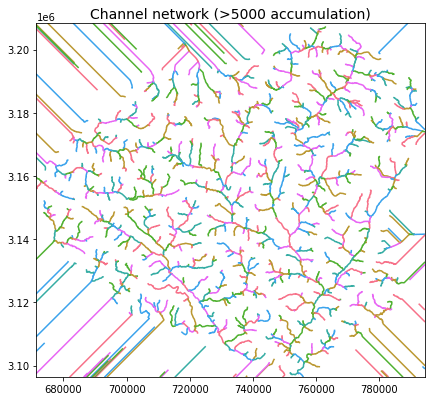

In [42]:
# Extract river network
branches = grid.extract_river_network(fdir, acc > 5000)

sns.set_palette('husl')
fig, ax = plt.subplots(figsize=(8.5, 6.5))

plt.xlim(grid.bbox[0], grid.bbox[2])
plt.ylim(grid.bbox[1], grid.bbox[3])
ax.set_aspect('equal')

for branch in branches['features']:
    line = np.asarray(branch['geometry']['coordinates'])
    plt.plot(line[:, 0], line[:, 1])

_ = plt.title('Channel network (>5000 accumulation)', size=14)

branches_gdf = gpd.GeoDataFrame.from_features(branches, crs=project_crs)
branches_gdf.to_file('branches.shp')

# %%
cut_network['drainage_pt'] = cut_network.intersection(branches_gdf.unary_union)
cut_network['drainage_area'] = cut_network['drainage_pt']
cut_network['drainage_area'] = cut_network['drainage_area']
#cut_network['drainage_area'] = wkt.dumps(cut_network['drainage_area'])
cut_network['drainage_area'] = cut_network.drainage_area.apply(lambda x: wkt.dumps(x))

In [43]:
def slope_gradient(elev, cellsize):
    px, py = np.gradient(elev, cellsize)
    slope_percent = np.sqrt(px ** 2 + py ** 2)
    # convert percentage to degrees
    slope_deg = np.degrees(np.arctan(slope_percent))
    return slope_deg

def catch_slope_score(x):
    if x < 10:
        return 1
    if 10 <= x < 20:
        return 2
    if 20 <= x < 30:
        return 3
    if 30 <= x < 40:
        return 4
    if x >= 40:
        return 5

def catch_area_score(x):
    if x < 50:
        return 1
    if 50 <= x < 100:
        return 2
    if 100 <= x < 500:
        return 3
    if 500 <= x < 1000:
        return 4
    if x >= 1000:
        return 5

In [44]:
catchment_area = []
catchment_slope = []
catchment_gdf = gpd.GeoDataFrame(geometry=[])

for row in cut_network.drainage_area:
    if "EMPTY" in row:
        # Handle empty catchment area
        catchment_area.append('0')
        catchment_slope.append('0')
    elif "MULTI" not in row:
        # Handle single catchment area
        grid = Grid.from_raster('output/Landslide_variables/01_dem.tif')   # remove at the end
        dem = grid.read_raster('output/Landslide_variables/01_dem.tif')    # remove at the end
        temp = row.split(" ",1)[1]
        x, y = map(str, temp.strip('()').split(' '))
        x_snap, y_snap = grid.snap_to_mask(acc > 200, (x, y))

        # Delineate the catchment
        catch = grid.catchment(x=x_snap, y=y_snap, fdir=fdir, xytype='coordinate')
        catch = grid.view(catch, dtype=np.uint8)

        # Plot the result
        grid.clip_to(catch)
        catch_view = grid.view(catch)

        # Create a vector representation of the catchment mask
        shapes = grid.polygonize(catch_view)
        catchment_polygon = ops.unary_union([geometry.shape(shape)
                                     for shape, value in shapes])
        catchment_area.append(catchment_polygon.area)

        # grid.clip_to(catch)
        dem_view = grid.view(dem)
        slope_deg = slope_gradient(dem_view, 30)
        mean_slope = np.mean(slope_deg)  #[slope_deg != 0])
        mean_slope = str(mean_slope).strip('()')
        catchment_slope.append(mean_slope)

        # Append catchment polygon to catchment_gdf
        catchment_gdf = catchment_gdf.append({'geometry': catchment_polygon, 'catchment_area': catchment_polygon.area, 'catchment_slope': mean_slope}, ignore_index=True)

    elif "MULTI" in row:
        # Handle multiple catchment areas
        multi_temp = row.split(" ", 1)[1]
        multi_list = multi_temp.strip('()').split(",")
        gdf = gpd.GeoDataFrame()
        for i in multi_list:
            grid = Grid.from_raster('output/Landslide_variables/01_dem.tif')   # remove at the end
            dem = grid.read_raster('output/Landslide_variables/01_dem.tif')    # remove at the end
            x, y = i.strip().split(' ')
            x_snap, y_snap = grid.snap_to_mask(acc > 200, (x, y))

            # Delineate the catchment
            catch = grid.catchment(x=x_snap, y=y_snap, fdir=fdir, xytype='coordinate')
            catch = grid.view(catch, dtype=np.uint8)

            # Plot the result
            grid.clip_to(catch)
            catch_view = grid.view(catch)

            # Create a vector representation of the catchment mask
            shapes = grid.polygonize(catch_view)
            catchment_polygon = ops.unary_union([geometry.shape(shape)
                                        for shape, value in shapes])
            catch_gdf = gpd.GeoDataFrame({'geometry':[catchment_polygon]})
            #gdf = gdf.append(catch_gdf)
            gdf = pd.concat([gdf, catch_gdf])
            catchment_polygon = gdf.unary_union
            dem_view = grid.view(dem)
            slope_deg = slope_gradient(dem_view, 30)
            mean_slope = np.mean(slope_deg)  #[slope_deg != 0])
            mean_slope = str(mean_slope).strip('()')

            catchment_area.append(catchment_polygon.area)
            catchment_slope.append(mean_slope)
            # Append catchment polygon to catchment_gdf
            catchment_gdf = catchment_gdf.append({'geometry': catchment_polygon, 'catchment_area': catchment_polygon.area, 'catchment_slope': mean_slope}, ignore_index=True)

    else:
        catchment_area.append('Not_Rated')
        catchment_slope.append('Not_Rated')

catchment_gdf['catchment_area'] = catchment_gdf['catchment_area'] / 10000

C:\Users\Danny\AppData\Local\Temp\ipykernel_14460\3083520974.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catchment_gdf = catchment_gdf.append({'geometry': catchment_polygon, 'catchment_area': catchment_polygon.area, 'catchment_slope': mean_slope}, ignore_index=True)
C:\Users\Danny\AppData\Local\Temp\ipykernel_14460\3083520974.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catchment_gdf = catchment_gdf.append({'geometry': catchment_polygon, 'catchment_area': catchment_polygon.area, 'catchment_slope': mean_slope}, ignore_index=True)
C:\Users\Danny\AppData\Local\Temp\ipykernel_14460\3083520974.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catchment_gdf = catchment_gdf.append({'geometry': catchment_polygon

C:\Users\Danny\AppData\Local\Temp\ipykernel_14460\3083520974.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catchment_gdf = catchment_gdf.append({'geometry': catchment_polygon, 'catchment_area': catchment_polygon.area, 'catchment_slope': mean_slope}, ignore_index=True)
C:\Users\Danny\AppData\Local\Temp\ipykernel_14460\3083520974.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catchment_gdf = catchment_gdf.append({'geometry': catchment_polygon, 'catchment_area': catchment_polygon.area, 'catchment_slope': mean_slope}, ignore_index=True)
C:\Users\Danny\AppData\Local\Temp\ipykernel_14460\3083520974.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catchment_gdf = catchment_gdf.append({'geometry': catchment_polygon

C:\Users\Danny\AppData\Local\Temp\ipykernel_14460\3083520974.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catchment_gdf = catchment_gdf.append({'geometry': catchment_polygon, 'catchment_area': catchment_polygon.area, 'catchment_slope': mean_slope}, ignore_index=True)
C:\Users\Danny\AppData\Local\Temp\ipykernel_14460\3083520974.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catchment_gdf = catchment_gdf.append({'geometry': catchment_polygon, 'catchment_area': catchment_polygon.area, 'catchment_slope': mean_slope}, ignore_index=True)
C:\Users\Danny\AppData\Local\Temp\ipykernel_14460\3083520974.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catchment_gdf = catchment_gdf.append({'geometry': catchment_polygon

C:\Users\Danny\AppData\Local\Temp\ipykernel_14460\3083520974.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catchment_gdf = catchment_gdf.append({'geometry': catchment_polygon, 'catchment_area': catchment_polygon.area, 'catchment_slope': mean_slope}, ignore_index=True)
C:\Users\Danny\AppData\Local\Temp\ipykernel_14460\3083520974.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catchment_gdf = catchment_gdf.append({'geometry': catchment_polygon, 'catchment_area': catchment_polygon.area, 'catchment_slope': mean_slope}, ignore_index=True)
C:\Users\Danny\AppData\Local\Temp\ipykernel_14460\3083520974.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catchment_gdf = catchment_gdf.append({'geometry': catchment_polygon

C:\Users\Danny\AppData\Local\Temp\ipykernel_14460\3083520974.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catchment_gdf = catchment_gdf.append({'geometry': catchment_polygon, 'catchment_area': catchment_polygon.area, 'catchment_slope': mean_slope}, ignore_index=True)
C:\Users\Danny\AppData\Local\Temp\ipykernel_14460\3083520974.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catchment_gdf = catchment_gdf.append({'geometry': catchment_polygon, 'catchment_area': catchment_polygon.area, 'catchment_slope': mean_slope}, ignore_index=True)
C:\Users\Danny\AppData\Local\Temp\ipykernel_14460\3083520974.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catchment_gdf = catchment_gdf.append({'geometry': catchment_polygon

C:\Users\Danny\AppData\Local\Temp\ipykernel_14460\3083520974.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catchment_gdf = catchment_gdf.append({'geometry': catchment_polygon, 'catchment_area': catchment_polygon.area, 'catchment_slope': mean_slope}, ignore_index=True)
C:\Users\Danny\AppData\Local\Temp\ipykernel_14460\3083520974.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catchment_gdf = catchment_gdf.append({'geometry': catchment_polygon, 'catchment_area': catchment_polygon.area, 'catchment_slope': mean_slope}, ignore_index=True)
C:\Users\Danny\AppData\Local\Temp\ipykernel_14460\3083520974.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catchment_gdf = catchment_gdf.append({'geometry': catchment_polygon

In [45]:
catchment_gdf.crs = cut_network.crs
df_filtered = catchment_gdf[catchment_gdf['catchment_area'] < 10000]
pluvial_edge = gpd.sjoin(edges_main_buffered, df_filtered, how="right", predicate="intersects")

In [46]:
# Assuming your GeoDataFrame is called 'gdf'
grouped = pluvial_edge.groupby('index_left')

# Calculate new area for each group
new_area = grouped['catchment_area'].sum()

# Get the maximum value assigned to each group
max_value = grouped['catchment_slope'].max()

# Create new GeoDataFrame with the dissolved groups and the new columns
dissolved_gdf = gpd.GeoDataFrame(geometry=grouped.geometry.first(),
                                 data={'new_area': new_area,
                                       'max_value': max_value})


In [47]:
edges_main_buffered[['catchment_area', 'catchment_slope']] = dissolved_gdf[['new_area', 'max_value']].astype(float)
edges_main_buffered[['catchment_area', 'catchment_slope']] = edges_main_buffered[['catchment_area', 'catchment_slope']].fillna(0)
edges_main_buffered['area_score'] = edges_main_buffered['catchment_area'].apply(catch_area_score)
edges_main_buffered['slope_score'] = edges_main_buffered['catchment_slope'].apply(catch_slope_score)
edges_main_buffered['pluvial_score'] = (edges_main_buffered['area_score'] + edges_main_buffered['slope_score']) / 2

In [48]:
#pluvial_edge['osmid'] = pluvial_edge['osmid'].astype(str)
#pluvial_edge['reversed'] = pluvial_edge['reversed'].astype(str)
dissolved_gdf['max_value'] = dissolved_gdf['max_value'].astype(float)

In [49]:
for col in pluvial_edge.columns:
    if pluvial_edge[col].dtype == 'object':
        if any(isinstance(val, list) for val in pluvial_edge[col]):
            print(f"The column '{col}' contains a list.")
        else:
            print(f"The column '{col}' does not contain a list.")

The column 'lc_major' does not contain a list.
The column 'catchment_slope' does not contain a list.


In [50]:
# FLUVIAL FLOOD MAPPING BASED ON FHI

In [51]:
pixel_size = dem_out_meta['transform'][0]

In [52]:
with rio.open(clay_path) as src_clay, rio.open(sand_path) as src_sand:
    clay = src_clay.read(1)
    sand = src_sand.read(1)

    group_a = (clay <= 20) & (sand > 50)
    group_b = (clay <= 25) & (sand <= 50)
    group_c = (clay > 20) & (clay <= 35) & (sand >= 45)
    group_d = (clay > 25) & (sand < 45) | (clay > 35)

    scs_classes = np.full(clay.shape, np.nan, dtype=np.float32)

    scs_classes[group_a] = 4
    scs_classes[group_b] = 6
    scs_classes[group_c] = 8
    scs_classes[group_d] = 10

# Store the profile before the datasets are closed
    profile = src_clay.profile

with rio.open('temporary/scs_fhi_classes.tif', 'w', **profile) as dst:
    dst.write(scs_classes, 1)

In [53]:
with rio.open('temporary/scs_fhi_classes.tif', mode='r+') as scs:
    scs.nodata = 0
    transform, width, height = calculate_default_transform(
        scs.crs, raster_crs, scs.width, scs.height, *scs.bounds)
    kwargs = scs.meta.copy()
    kwargs.update({
        'crs': raster_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rio.open('temporary/scs_fhi_classes_reproj.tif', 'w', **kwargs) as scs_proj:
        scs_proj.nodata = 0
        for i in range(1, scs.count + 1):
            reproject(
                source=rio.band(scs, i),
                destination=rio.band(scs_proj, i),
                resampling=Resampling.nearest)

# Open the original raster
with rio.open('temporary/scs_fhi_classes_reproj.tif') as src:

    # Get the existing transform and width/height
    transform, width, height = calculate_default_transform(src.crs, src.crs, src.width, src.height, *src.bounds)

    # Modify the existing transform to match the new resolution
    pixel_size = dem_out_meta['transform'][0]
    transform = Affine(pixel_size, 0, src.bounds.left, 0, -pixel_size, src.bounds.top)

    # Calculate the new width and height based on the new resolution
    new_width = int(np.ceil((src.bounds.right - src.bounds.left) / pixel_size))
    new_height = int(np.ceil((src.bounds.top - src.bounds.bottom) / pixel_size))

    # Create a metadata dictionary for the resampled raster
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': src.crs,
        'transform': transform,
        'width': new_width,
        'height': new_height
    })

    # Write the resampled raster to a new file
    with rio.open('temporary/scs_fhi_classes_resampled.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(source=rio.band(src, i), destination=rio.band(dst, i), resampling=Resampling.nearest)

            
with rio.open('output/Landslide_variables/01_dem.tif') as target_raster:
    target_transform = target_raster.transform
    target_height, target_width = target_raster.shape
    
with rio.open('temporary/scs_fhi_classes_resampled.tif') as scs_proj:
    scs_out_image, out_transform = rio.mask.mask(scs_proj, aoi_flooding.geometry, crop=True)
    scs_out_meta = scs_proj.meta
    pixel_size = abs(transform.a)

scs_out_meta.update({"driver": "GTiff",
                     "height": target_height,
                     "width": target_width,
                     "transform": target_transform})

with rio.open('temporary/scs_fhi_classes_transformed.tif', "w", **scs_out_meta) as scs_dest:
    scs_dest.nodata = 0
    scs_dest.write(scs_out_image)

In [54]:
# Open the DEM raster
with rio.open('output/Landslide_variables/01_dem.tif') as src:
    # Read the raster into a NumPy array
    dem_data  = src.read(1)
    cellsize = src.res[0]

# Evaluate gradient in two dimensions
px, py = np.gradient(dem_data, cellsize)
slope = np.sqrt(px ** 2 + py ** 2)
#slope_percent = np.tan(slope) * 100

# If needed in degrees, convert using
slope_deg = np.degrees(np.arctan(slope))
slope_percent = np.tan(np.deg2rad(slope_deg)) * 100

# Initialize the new raster with NaN values
slope_classes = np.full(slope_percent.shape, np.nan, dtype=np.float32)

# Define the criteria for each group
group_a = (slope_percent >= 0) & (slope_percent <= 2)
group_b = (slope_percent > 2) & (slope_percent <= 5)
group_c = (slope_percent > 5) & (slope_percent <= 15)
group_d = (slope_percent > 15) & (slope_percent <= 35)
group_e = (slope_percent > 35)

# Assign values to the new raster based on the criteria
slope_classes[group_a] = 10
slope_classes[group_b] = 8
slope_classes[group_c] = 6
slope_classes[group_d] = 4
slope_classes[group_e] = 2

# Write the new raster to disk
with rio.open('output/slope_gradient_fhi_classes.tif', 'w',
        driver='GTiff',
        width=slope_percent.shape[1],
        height=slope_percent.shape[0],
        count=1,
        dtype=rio.float32,
        crs=raster_crs,
        transform=src.transform
) as dst:
    dst.write(slope_classes.astype(rio.float32), 1)

In [55]:
# Write the new raster to disk
with rio.open('output/Landslide_variables/02_slope.tif', 'w',
        driver='GTiff',
        width=slope_percent.shape[1],
        height=slope_percent.shape[0],
        count=1,
        dtype=rio.float32,
        crs=raster_crs,
        transform=src.transform
) as dst:
    dst.write(slope_percent.astype(rio.float32), 1)

In [56]:
'''with rio.open('/output/Landslide_variables/01_dem.tif') as dem:
    aoi = dem.read(1)
    aoi_transform = dem.transform

with rio.open('flow_acc.tif') as flow_acc:
    flow_acc_image, flow_acc_transform = rio.mask.mask(flow_acc, aoi, invert=False, transform=aoi_transform)
    flow_acc_meta = flow_acc.meta

flow_acc_meta.update({"driver": "GTiff",
                     "height": flow_acc_image.shape[1],
                     "width": flow_acc_image.shape[2],
                     "transform": flow_acc_transform})

with rio.open('flow_acc1.tif', "w", **flow_acc_meta) as flow_acc_dest:
    flow_acc_dest.nodata = 0
    flow_acc_dest.write(flow_acc_image)'''


# Open the flow accumulation raster
with rio.open('flow_acc.tif') as src:
    profile = src.profile
    flow_acc = src.read(1)
# Flatten the flow accumulation array
flow_acc_flat = flow_acc.ravel()

# Calculate the natural breaks using a sample of the data
sample_size = 10000
sample_idx = np.random.choice(flow_acc_flat.size, size=sample_size, replace=False)
breaks = jenks_breaks(flow_acc_flat[sample_idx], n_classes=4)

# Assign values to the new raster based on the natural breaks
flow_acc_classes = np.digitize(flow_acc, breaks, right=True) * 2

# Write the new raster to disk
with rio.open('temporary/flow_acc_classes.tif', 'w', **profile) as dst:
    dst.write(flow_acc_classes, 1)

In [57]:
# Open the flow accumulation raster
with rio.open('output/Landslide_variables/01_dem.tif') as src:
    profile = src.profile
    dem = src.read(1)
# Flatten the flow accumulation array
dem_flat = dem.ravel()

# Calculate the natural breaks using a sample of the data
sample_size = 10000
sample_idx = np.random.choice(dem_flat.size, size=sample_size, replace=False)
breaks = jenks_breaks(dem_flat[sample_idx], n_classes=4)

# Assign values to the new raster based on the natural breaks and multiply by 2
dem_classes = np.digitize(dem, breaks, right=True) * 2

# Write the new raster to disk
with rio.open('output/dem_fhi_classes.tif', 'w', **profile) as dst:
    dst.write(dem_classes, 1)

In [58]:
with rio.open(prec_path, mode='r+') as prec:
    prec.nodata = 0
    transform, width, height = calculate_default_transform(
        prec.crs, raster_crs, prec.width, prec.height, *prec.bounds)
    kwargs = prec.meta.copy()
    kwargs.update({
        'crs': raster_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rio.open('temporary/max_annual_precipitation_proj.tif', 'w', **kwargs) as prec_proj:
        prec_proj.nodata = 0
        for i in range(1, prec.count + 1):
            reproject(
                source=rio.band(prec, i),
                destination=rio.band(prec_proj, i),
                resampling=Resampling.nearest)


# Open the original raster
with rio.open('temporary/max_annual_precipitation_proj.tif') as src:

    # Get the existing transform and width/height
    transform, width, height = calculate_default_transform(src.crs, src.crs, src.width, src.height, *src.bounds)

    # Modify the existing transform to match the new resolution
    pixel_size = dem_out_meta['transform'][0]
    transform = Affine(pixel_size, 0, src.bounds.left, 0, -pixel_size, src.bounds.top)

    # Calculate the new width and height based on the new resolution
    new_width = int(np.ceil((src.bounds.right - src.bounds.left) / pixel_size))
    new_height = int(np.ceil((src.bounds.top - src.bounds.bottom) / pixel_size))

    # Create a metadata dictionary for the resampled raster
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': src.crs,
        'transform': transform,
        'width': new_width,
        'height': new_height
    })

    # Write the resampled raster to a new file
    with rio.open('temporary/max_annual_precipitation_clipped.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(source=rio.band(src, i), destination=rio.band(dst, i), resampling=Resampling.nearest)
            

with rio.open('temporary/max_annual_precipitation_clipped.tif') as prec_proj:
    prec_out_image, out_transform = rio.mask.mask(prec_proj, aoi_flooding.geometry, crop=True)
    prec_out_meta = prec_proj.meta
    pixel_size = abs(transform.a)
prec_out_meta.update({"driver": "GTiff",
                     "height": prec_out_image.shape[1],
                     "width": prec_out_image.shape[2],
                     "transform": out_transform})

with rio.open('output/Landslide_variables/08_prec.tif', "w", **prec_out_meta) as prec_dest:
    prec_dest.nodata = 0
    prec_dest.write(prec_out_image)

In [59]:
# Open the reprojected prec raster and clip by the clipping shapefile
with rio.open('output/Landslide_variables/08_prec.tif') as src_prec:
    profile = src_prec.profile
    prec = src_prec.read(1)

# Flatten the prec array
prec_flat = prec.ravel()

# Calculate the natural breaks using a sample of the data
sample_size = 10000
sample_idx = np.random.choice(prec_flat.size, size=sample_size, replace=False)
breaks = jenks_breaks(prec_flat[sample_idx], n_classes=5)

# Assign values to the new raster based on the natural breaks
precipitation_classes = np.digitize(prec, breaks, right=True) * 2

# Write the new raster to disk
with rio.open('output/precipitation_fhi_classes.tif', 'w', **profile) as dst:
    dst.write(precipitation_classes, 1)

In [60]:
'''# Get the extent of the input GeoDataFrame
xmin, ymin, xmax, ymax = branches_gdf.total_bounds

# Calculate the width and height of the output raster in pixels
width = int(np.ceil((xmax - xmin) / pixel_size))
height = int(np.ceil((ymax - ymin) / pixel_size))

# Create a transformation matrix that maps pixel coordinates to CRS coordinates
transform = rio.transform.from_bounds(xmin, ymin, xmax, ymax, width, height)

# Create a binary raster where the pixels inside the geometries are set to 1
shapes = [(mapping(geometry), 1) for geometry in branches_gdf.geometry]
branches_raster = rasterize(shapes, out_shape=(height, width), transform=transform)

# Calculate the Euclidean distance from each pixel to the nearest pixel with a value of 0
distance_raster = distance_transform_edt(1 - branches_raster, pixel_size)

# Write the distance raster to a GeoTIFF file
with rio.open('distance.tif', 'w', driver='GTiff', width=width, height=height, count=1, dtype=distance_raster.dtype, transform=transform) as dst:
    dst.write(distance_raster, 1)
# Write the branches raster to a GeoTIFF file
with rio.open('branches.tif', 'w', driver='GTiff', width=width, height=height, count=1, dtype=branches_raster.dtype, transform=transform) as dst:
    dst.write(branches_raster, 1)'''

"# Get the extent of the input GeoDataFrame\nxmin, ymin, xmax, ymax = branches_gdf.total_bounds\n\n# Calculate the width and height of the output raster in pixels\nwidth = int(np.ceil((xmax - xmin) / pixel_size))\nheight = int(np.ceil((ymax - ymin) / pixel_size))\n\n# Create a transformation matrix that maps pixel coordinates to CRS coordinates\ntransform = rio.transform.from_bounds(xmin, ymin, xmax, ymax, width, height)\n\n# Create a binary raster where the pixels inside the geometries are set to 1\nshapes = [(mapping(geometry), 1) for geometry in branches_gdf.geometry]\nbranches_raster = rasterize(shapes, out_shape=(height, width), transform=transform)\n\n# Calculate the Euclidean distance from each pixel to the nearest pixel with a value of 0\ndistance_raster = distance_transform_edt(1 - branches_raster, pixel_size)\n\n# Write the distance raster to a GeoTIFF file\nwith rio.open('distance.tif', 'w', driver='GTiff', width=width, height=height, count=1, dtype=distance_raster.dtype, tr

In [61]:
# Set resolution
pixel_size = dem_out_meta['transform'][0]

# Get the extent of the input GeoDataFrame
xmin, ymin, xmax, ymax = branches_gdf.total_bounds

# Calculate the width and height of the output raster in pixels
width = int(np.ceil((xmax - xmin) / pixel_size))
height = int(np.ceil((ymax - ymin) / pixel_size))

# Create a transformation matrix that maps pixel coordinates to CRS coordinates
transform = rio.transform.from_bounds(xmin, ymin, xmax, ymax, width, height)

# Create a binary raster where the pixels inside the geometries are set to 1
shapes = [(mapping(geometry), 1) for geometry in branches_gdf.geometry]
branches_raster = rasterize(shapes, out_shape=(height, width), transform=transform)

# Calculate the Euclidean distance from each pixel to the nearest pixel with a value of 0
distance_raster = distance_transform_edt(1 - branches_raster, pixel_size)

# Write the distance raster to a GeoTIFF file
with rio.open('temporary/distance.tif', 'w', driver='GTiff', width=width, height=height, count=1, dtype=distance_raster.dtype, transform=transform) as dst:
    dst.write(distance_raster, 1)
# Write the branches raster to a GeoTIFF file
with rio.open('temporary/branches.tif', 'w', driver='GTiff', width=width, height=height, count=1, dtype=branches_raster.dtype, transform=transform) as dst:
    dst.write(branches_raster, 1)

In [62]:
with rio.open('temporary/distance.tif', mode='r+') as distance_river:
    distance_river.nodata = 0
    transform, width, height = calculate_default_transform(
        distance_river.crs, raster_crs, distance_river.width, distance_river.height, *distance_river.bounds)
    kwargs = distance_river.meta.copy()
    kwargs.update({
        'crs': raster_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rio.open('temporary/distance_proj.tif', 'w', **kwargs) as distance_river_proj:
        distance_river_proj.nodata = 0
        for i in range(1, distance_river.count + 1):
            reproject(
                source=rio.band(distance_river, i),
                destination=rio.band(distance_river_proj, i),
                resampling=Resampling.nearest)


# Open the original raster
with rio.open('temporary/distance_proj.tif') as src:

    # Get the existing transform and width/height
    transform, width, height = calculate_default_transform(src.crs, src.crs, src.width, src.height, *src.bounds)

    # Modify the existing transform to match the new resolution
    pixel_size = dem_out_meta['transform'][0]
    transform = Affine(pixel_size, 0, src.bounds.left, 0, -pixel_size, src.bounds.top)

    # Calculate the new width and height based on the new resolution
    new_width = int(np.ceil((src.bounds.right - src.bounds.left) / pixel_size))
    new_height = int(np.ceil((src.bounds.top - src.bounds.bottom) / pixel_size))

    # Create a metadata dictionary for the resampled raster
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': src.crs,
        'transform': transform,
        'width': new_width,
        'height': new_height
    })

    # Write the resampled raster to a new file
    with rio.open('temporary/distance_resampled.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(source=rio.band(src, i), destination=rio.band(dst, i), resampling=Resampling.nearest)

            
with rio.open('output/Landslide_variables/01_dem.tif') as target_raster:
    target_transform = target_raster.transform
    target_height, target_width = target_raster.shape
    
with rio.open('temporary/distance_resampled.tif') as distance_river_proj:
    distance_river_out_image, out_transform = rio.mask.mask(distance_river_proj, aoi_flooding.geometry, crop=True)
    distance_river_out_meta = distance_river_proj.meta
    pixel_size = abs(transform.a)

distance_river_out_meta.update({"driver": "GTiff",
                     "height": target_height,
                     "width": target_width,
                     "transform": target_transform})

with rio.open('temporary/distance_river_transformed.tif', "w", **distance_river_out_meta) as distance_river_dest:
    distance_river_dest.nodata = 0
    distance_river_dest.write(distance_river_out_image)


            
'''with rio.open(distance_river_temp) as distance_river_proj:
    distance_river_out_image, out_transform = rio.mask.mask(distance_river_proj, aoi_flooding.geometry, crop=True)
    distance_river_out_meta = distance_river_proj.meta
    pixel_size = abs(transform.a)
distance_river_out_meta.update({"driver": "GTiff",
                     "height": distance_river_out_image.shape[1],
                     "width": distance_river_out_image.shape[2],
                     "transform": out_transform})

with rio.open(distance_river_files, "w", **distance_river_out_meta) as distance_river_dest:
    distance_river_dest.nodata = 0
    distance_river_dest.write(distance_river_out_image)'''

'with rio.open(distance_river_temp) as distance_river_proj:\n    distance_river_out_image, out_transform = rio.mask.mask(distance_river_proj, aoi_flooding.geometry, crop=True)\n    distance_river_out_meta = distance_river_proj.meta\n    pixel_size = abs(transform.a)\ndistance_river_out_meta.update({"driver": "GTiff",\n                     "height": distance_river_out_image.shape[1],\n                     "width": distance_river_out_image.shape[2],\n                     "transform": out_transform})\n\nwith rio.open(distance_river_files, "w", **distance_river_out_meta) as distance_river_dest:\n    distance_river_dest.nodata = 0\n    distance_river_dest.write(distance_river_out_image)'

In [63]:
# Open the distance raster file in read mode
with rio.open('temporary/distance_river_transformed.tif', 'r') as src:
    # Read the distance raster as a NumPy array
    distance_raster = src.read(1)
    
    # Define the criteria for each group
    group_a = (distance_raster <= 200)
    group_b = (distance_raster > 200) & (distance_raster <= 500)
    group_c = (distance_raster > 500) & (distance_raster <= 1000)
    group_d = (distance_raster > 1000) & (distance_raster <= 2000)
    group_e = (distance_raster > 2000)

    # Create a new NumPy array for the new raster
    distance_river_classes = np.zeros(distance_raster.shape, dtype=np.uint8)

    # Assign values to the new raster based on the criteria
    distance_river_classes[group_a] = 10
    distance_river_classes[group_b] = 8
    distance_river_classes[group_c] = 6
    distance_river_classes[group_d] = 4
    distance_river_classes[group_e] = 2

    # Create a copy of the profile of the input raster, and modify it to write the new raster
    profile = src.profile
    profile.update(
        dtype=np.uint8,
        count=1,
        compress='lzw')

# Write the new raster to disk
with rio.open('output/distance_river_fhi_classes.tif', 'w', **profile) as dst:
    dst.write(distance_river_classes, 1)

In [64]:
# Open the original raster
with rio.open('temporary/landcover_reproj.tif') as src:

    # Get the existing transform and width/height
    transform, width, height = calculate_default_transform(src.crs, src.crs, src.width, src.height, *src.bounds)

    # Modify the existing transform to match the new resolution
    pixel_size = dem_out_meta['transform'][0]
    transform = Affine(pixel_size, 0, src.bounds.left, 0, -pixel_size, src.bounds.top)

    # Calculate the new width and height based on the new resolution
    new_width = int(np.ceil((src.bounds.right - src.bounds.left) / pixel_size))
    new_height = int(np.ceil((src.bounds.top - src.bounds.bottom) / pixel_size))

    # Create a metadata dictionary for the resampled raster
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': src.crs,
        'transform': transform,
        'width': new_width,
        'height': new_height
    })

    # Write the resampled raster to a new file
    with rio.open('temporary/landcover_transformed.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(source=rio.band(src, i), destination=rio.band(dst, i), resampling=Resampling.nearest)

with rio.open('output/Landslide_variables/01_dem.tif') as target_raster:
    target_transform = target_raster.transform
    target_height, target_width = target_raster.shape
    
with rio.open('temporary/landcover_transformed.tif') as scs_proj:
    scs_out_image, out_transform = rio.mask.mask(scs_proj, aoi_flooding.geometry, crop=True)
    scs_out_meta = scs_proj.meta
    pixel_size = abs(transform.a)

scs_out_meta.update({"driver": "GTiff",
                     "height": target_height,
                     "width": target_width,
                     "transform": target_transform})

with rio.open('temporary/landcover_transformed.tif', "w", **scs_out_meta) as scs_dest:
    scs_dest.nodata = 0
    scs_dest.write(scs_out_image)

In [65]:
# Open the distance raster file in read mode
with rio.open('temporary/landcover_transformed.tif', 'r') as src:
    # Read the distance raster as a NumPy array
    landcover_raster = src.read(1)
    
    # Define the criteria for each group
    group_a = (landcover_raster == 80 ) | (landcover_raster == 90)
    group_b = (landcover_raster == 50) | (landcover_raster == 60)
    group_c = (landcover_raster == 30) | (landcover_raster == 20)
    group_d = (landcover_raster == 40)
    group_e = (landcover_raster == 10) | (landcover_raster == 110) | (landcover_raster == 70)

    # Create a new NumPy array for the new raster
    landcover_classes = np.zeros(landcover_raster.shape, dtype=np.uint8)

    # Assign values to the new raster based on the criteria
    landcover_classes[group_a] = 10
    landcover_classes[group_b] = 8
    landcover_classes[group_c] = 6
    landcover_classes[group_d] = 4
    landcover_classes[group_e] = 2
    
    # Create a copy of the profile of the input raster, and modify it to write the new raster
    profile = src.profile
    profile.update(
        dtype=np.uint8,
        count=1,
        compress='lzw')

# Write the new raster to disk
with rio.open('output/landcover_fhi_classes.tif', 'w', **profile) as dst:
    dst.write(landcover_classes, 1)



# Open the input rasters
with rio.open('output/slope_gradient_fhi_classes.tif') as slope, \
     rio.open('temporary/flow_acc_classes.tif') as flow_acc, \
     rio.open('output/distance_river_fhi_classes.tif') as distance_river, \
     rio.open('output/dem_fhi_classes.tif') as dem, \
     rio.open('temporary/scs_fhi_classes_transformed.tif') as scs, \
     rio.open('output/precipitation_fhi_classes.tif') as precipitation, \
     rio.open('output/landcover_fhi_classes.tif') as landcover:

    # Double-check CRS, resolution, and extent for each raster
    for src in [slope, flow_acc, distance_river, dem, scs, precipitation, landcover]:
        print(f"CRS: {src.crs}")
        print(f"Resolution: {src.res}")
        print(f"Extent: {src.bounds}")
        print(f"Shape: {src.shape}\n")

CRS: EPSG:32644
Resolution: (28.01603007563341, 28.01603007563341)
Extent: BoundingBox(left=671474.9042335105, bottom=3096449.762975713, right=794325.196115163, top=3208261.7390075657)
Shape: (3991, 4385)

CRS: EPSG:32644
Resolution: (28.01603007563341, 28.01603007563341)
Extent: BoundingBox(left=671474.9042335105, bottom=3096449.762975713, right=794325.196115163, top=3208261.7390075657)
Shape: (3991, 4385)

CRS: EPSG:32644
Resolution: (28.01603007563341, 28.01603007563341)
Extent: BoundingBox(left=671474.9042335105, bottom=3096449.762975713, right=794325.196115163, top=3208261.7390075657)
Shape: (3991, 4385)

CRS: EPSG:32644
Resolution: (28.01603007563341, 28.01603007563341)
Extent: BoundingBox(left=671474.9042335105, bottom=3096449.762975713, right=794325.196115163, top=3208261.7390075657)
Shape: (3991, 4385)

CRS: EPSG:32644
Resolution: (28.01603007563341, 28.01603007563341)
Extent: BoundingBox(left=671474.9042335105, bottom=3096449.762975713, right=794325.196115163, top=3208261.739

In [66]:
with rio.open('output/slope_gradient_fhi_classes.tif') as slope, \
     rio.open('temporary/flow_acc_classes.tif') as flow_acc, \
     rio.open('output/distance_river_fhi_classes.tif') as distance_river, \
     rio.open('output/dem_fhi_classes.tif') as dem, \
     rio.open('temporary/scs_fhi_classes_transformed.tif') as scs, \
     rio.open('output/precipitation_fhi_classes.tif') as precipitation, \
     rio.open('output/landcover_fhi_classes.tif') as landcover:

    # Multiply the values of each raster band
    slope_band = slope.read(1)
    flow_acc_band = flow_acc.read(1)
    distance_river_band = distance_river.read(1)
    dem_band = dem.read(1)
    scs_band = scs.read(1)
    precipitation_band = precipitation.read(1)
    landcover_band = landcover.read(1)

    fhi = (slope_band * 1.64) + (flow_acc_band * 3.51) + (distance_river_band * 2.44) + (dem_band * 0.27) + (scs_band * 0.58) + (precipitation_band * 0.48) + (landcover_band + 1.08)

#profile = src1.profile
profile.update(dtype=rio.float32, count=1, nodata=None)
with rio.open('fhi.tif', 'w', **profile) as dst:
    dst.write(fhi, 1)

In [67]:
# open the raster file using rasterio
with rio.open('fhi.tif') as src:
    fhi = src.read(1)
    affine = src.transform

# %% calculating zonal statistics
flood_means = rasterstats.zonal_stats(edges_main_buffered, fhi,
                                         affine=affine,
                                         nodata=np.nan,
                                         stats=['mean'],
                                         geojson_out=True)

# extract average population data from list
flood_mean_list = []
i = 0

while i < len(flood_means):
    flood_mean_list.append(flood_means[i]['properties'])
    i = i + 1

# %% create df and assign scores based on quantiles ## get NaN values if not converting index
flood_mean = pd.DataFrame(flood_mean_list)
flood_mean = flood_mean.set_index(edges_main_buffered.index)
edges_main_buffered['fhi'] = flood_mean['mean']

In [68]:
# Compute Jenks natural breaks
breaks = jenks_breaks(edges_main_buffered['fhi'], n_classes=5)
# Cut cut_network['road_pop'] based on the breaks
edges_main_buffered['fhi_score'] = np.digitize(edges_main_buffered['fhi'], bins=breaks, right=True)

In [69]:
# LANDSLIDE MAPPING WITH RANDOM FOREST

In [70]:
dataset = pd.read_csv(rf_csv, sep = ";")
# Slice the columns from the second item to the end and convert to list
targets = dataset.columns[1:11].tolist()

# %%

# compute VIF for the features
def calculate_vif(df, features):
    vif, tolerance = {}, {}
    
    for feature in features:        
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]
        X, y = df[X], df[feature]
        
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)

        # compute VIF
        vif[feature] = 1 / (1 - r2)
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif})

# call fuction calculate_vif with features as input
pd.options.display.float_format = '{:.2f}'.format
calculate_vif(df=dataset, 
              features=dataset.columns[dataset.columns != "IDI"].to_list())

,VIF
aspect,1.02
distance_river,1.16
geology,1.52
land_cover,2.97
ndvi,3.10
plan_curvature,1.93
precipitation,1.48
profile_curvature,1.04
slope,1.08
soil_parent,2.97


In [71]:
# Bin aspect values into categories
dataset['aspect'] = pd.cut(dataset['aspect'], bins=[22.5, 67.5, 112.5, 157.5, 202.5, 247.5, 292.5, 337.5], labels=["NE", "E", "SE", "S", "SW", "W", "NW"])
dataset['aspect'] = dataset['aspect'].cat.add_categories("N")
dataset['aspect'].fillna("N", inplace=True)
dataset['land_cover'] = dataset['land_cover'] / 10
dataset['land_cover'] = dataset['land_cover'].astype(int)

transformer = make_column_transformer(
    (OneHotEncoder(), ['aspect']),
    (OneHotEncoder(), ['land_cover']),
    (OneHotEncoder(), ['geology']),
    (OneHotEncoder(), ['soil_parent']),
    remainder='passthrough')

transformed = transformer.fit_transform(dataset)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names_out()
)
cols_to_drop = ['aspect', 'land_cover', 'geology', 'soil_parent']
dataset.drop(cols_to_drop, axis=1, inplace=True)
# standardize the dataframe
# define standard scaler

idi = dataset[['IDI']]
dataset_without_idi = dataset.drop(columns=['IDI'])

scaler = StandardScaler()
# transform data
df = scaler.fit_transform(dataset_without_idi)
ds = pd.DataFrame(df, columns=dataset_without_idi.columns)

dataset = pd.concat([ds, transformed_df], axis=1)
cols_to_drop = [col for col in dataset.columns if 'remainder__' in col]
dataset.drop(cols_to_drop, axis=1, inplace=True)
dataset.rename(columns=lambda x: x.split("__")[-1], inplace=True)
# concatenate dataset and idi
dataset = pd.concat([idi, dataset], axis=1)

In [72]:
y = dataset['IDI']
X = dataset.drop(['IDI'], axis=1)

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=SEED)

features = X.columns.values # The name of each column
classes = ['0', '1'] # The name of each class

In [73]:
param_dist = {
    'bootstrap': [True],
    'max_depth': Integer(1, 100),
    'max_features': Categorical(['sqrt', 'log2', 'auto']),
    'min_samples_leaf': Integer(1, 10),
    'min_samples_split': Integer(2, 15),
    'n_estimators': Integer(50, 1000)
}

rf = RandomForestClassifier()

bayes_search = BayesSearchCV(
    estimator=rf,
    search_spaces=param_dist,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the BayesSearchCV object to the data
bayes_search.fit(X_train, y_train)


print("Best parameters: ", bayes_search.best_params_)
print("Best score: ", bayes_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

OOB score: 0.8832720588235294
F1 score: 0.8764808060658447

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       295
           1       0.87      0.78      0.83       172

    accuracy                           0.88       467
   macro avg       0.88      0.86      0.87       467
weighted avg       0.88      0.88      0.88       467



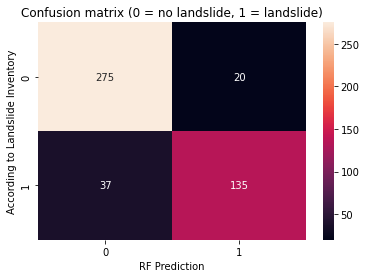

In [74]:
from sklearn.metrics import f1_score

best_rf = RandomForestClassifier(**bayes_search.best_params_, 
                                oob_score=True,
                                random_state=SEED)
best_rf.fit(X_train, y_train)

print("OOB score:", best_rf.oob_score_)
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)

f1_score_ = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1_score_)
print("")
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
sns_plot = sns.heatmap(cm, annot=True, fmt='d')
sns_plot.set_title('Confusion matrix (0 = no landslide, 1 = landslide)')
sns_plot.set_xlabel('RF Prediction')
sns_plot.set_ylabel('According to Landslide Inventory')
plt.show()

In [75]:
feature_names = list(X_test.columns)
importances = best_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)
pd.options.display.float_format = '{:.4f}'.format
forest_importances

slope               0.0959
tpi                 0.0582
profile_curvature   0.0426
plan_curvature      0.0566
vrm                 0.0448
ndvi                0.0984
precipitation       0.1651
distance_river      0.0563
aspect_E            0.0072
aspect_N            0.0144
aspect_NE           0.0061
aspect_NW           0.0147
aspect_S            0.0045
aspect_SE           0.0161
aspect_SW           0.0056
aspect_W            0.0060
land_cover_1        0.0085
land_cover_3        0.0094
land_cover_4        0.0001
land_cover_6        0.0056
land_cover_7        0.0255
land_cover_10       0.0092
geology_10          0.0138
geology_11          0.0054
geology_12          0.0061
geology_13          0.0016
geology_15          0.0044
geology_16          0.0001
geology_24          0.0115
geology_26          0.0209
geology_27          0.0130
geology_30          0.0041
soil_parent_9       0.0005
soil_parent_11      0.0096
soil_parent_12      0.0533
soil_parent_13      0.0000
soil_parent_14      0.0450
s

Text(0.5, 0.3, 'ROC AUC = 0.9436')

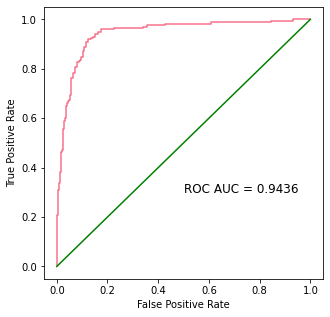

In [76]:
def plot_sklearn_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
plot_sklearn_roc_curve(y_test, y_proba[:, 1])
roc_auc = roc_auc_score(y_test, y_proba[:, 1])
plt.text(0.5, 0.3, f"ROC AUC = {roc_auc:.4f}", fontsize=12)

In [77]:
dem_ds = gdal.Open('output/Landslide_variables/01_dem.tif')

# Calculate TPI and save to output file
gdal.DEMProcessing('output/Landslide_variables/03_tpi.tif', dem_ds, 'TPI', computeEdges=True)

# Close the input DEM file
dem_ds = None

In [78]:
dem_ds = gdal.Open('output/Landslide_variables/01_dem.tif')

# Calculate aspect and save to output file
gdal.DEMProcessing('temporary/aspect.tif', dem_ds, 'aspect')

# Close the input DEM file
dem_ds = None

In [79]:
with rio.open(geology_path, mode='r+') as geology:
    geology.nodata = 0
    transform, width, height = calculate_default_transform(
        geology.crs, raster_crs, geology.width, geology.height, *geology.bounds)
    kwargs = geology.meta.copy()
    kwargs.update({
        'crs': raster_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rio.open('temporary/geology_reproj.tif', 'w', **kwargs) as geology_proj:
        geology_proj.nodata = 0
        for i in range(1, geology.count + 1):
            reproject(
                source=rio.band(geology, i),
                destination=rio.band(geology_proj, i),
                resampling=Resampling.nearest)


# Open the original raster
with rio.open('temporary/geology_reproj.tif') as src:

    # Get the existing transform and width/height
    transform, width, height = calculate_default_transform(src.crs, src.crs, src.width, src.height, *src.bounds)

    # Modify the existing transform to match the new resolution
    pixel_size = dem_out_meta['transform'][0]
    transform = Affine(pixel_size, 0, src.bounds.left, 0, -pixel_size, src.bounds.top)

    # Calculate the new width and height based on the new resolution
    new_width = int(np.ceil((src.bounds.right - src.bounds.left) / pixel_size))
    new_height = int(np.ceil((src.bounds.top - src.bounds.bottom) / pixel_size))

    # Create a metadata dictionary for the resampled raster
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': src.crs,
        'transform': transform,
        'width': new_width,
        'height': new_height
    })

    # Write the resampled raster to a new file
    with rio.open('temporary/geology_clipped.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(source=rio.band(src, i), destination=rio.band(dst, i), resampling=Resampling.nearest)
            

with rio.open('temporary/geology_clipped.tif') as geology_proj:
    geology_out_image, out_transform = rio.mask.mask(geology_proj, aoi_flooding.geometry, crop=True)
    geology_out_meta = geology_proj.meta
    pixel_size = abs(transform.a)
geology_out_meta.update({"driver": "GTiff",
                     "height": geology_out_image.shape[1],
                     "width": geology_out_image.shape[2],
                     "transform": out_transform})

with rio.open('temporary/geology_resampled.tif', "w", **geology_out_meta) as geology_dest:
    geology_dest.nodata = 0
    geology_dest.write(geology_out_image)

In [80]:
with rio.open(ndvi_path, mode='r+') as ndvi:
    ndvi.nodata = 0
    transform, width, height = calculate_default_transform(
        ndvi.crs, raster_crs, ndvi.width, ndvi.height, *ndvi.bounds)
    kwargs = ndvi.meta.copy()
    kwargs.update({
        'crs': raster_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rio.open('temporary/NDVI_reproj.tif', 'w', **kwargs) as ndvi_proj:
        ndvi_proj.nodata = 0
        for i in range(1, ndvi.count + 1):
            reproject(
                source=rio.band(ndvi, i),
                destination=rio.band(ndvi_proj, i),
                resampling=Resampling.nearest)


# Open the original raster
with rio.open('temporary/NDVI_reproj.tif') as src:

    # Get the existing transform and width/height
    transform, width, height = calculate_default_transform(src.crs, src.crs, src.width, src.height, *src.bounds)

    # Modify the existing transform to match the new resolution
    pixel_size = dem_out_meta['transform'][0]
    transform = Affine(pixel_size, 0, src.bounds.left, 0, -pixel_size, src.bounds.top)

    # Calculate the new width and height based on the new resolution
    new_width = int(np.ceil((src.bounds.right - src.bounds.left) / pixel_size))
    new_height = int(np.ceil((src.bounds.top - src.bounds.bottom) / pixel_size))

    # Create a metadata dictionary for the resampled raster
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': src.crs,
        'transform': transform,
        'width': new_width,
        'height': new_height
    })

    # Write the resampled raster to a new file
    with rio.open('temporary/NDVI_clipped.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(source=rio.band(src, i), destination=rio.band(dst, i), resampling=Resampling.nearest)
            

with rio.open('temporary/NDVI_clipped.tif') as ndvi_proj:
    ndvi_out_image, out_transform = rio.mask.mask(ndvi_proj, aoi_flooding.geometry, crop=True)
    ndvi_out_meta = ndvi_proj.meta
    pixel_size = abs(transform.a)
ndvi_out_meta.update({"driver": "GTiff",
                     "height": ndvi_out_image.shape[1],
                     "width": ndvi_out_image.shape[2],
                     "transform": out_transform})

with rio.open('output/Landslide_variables/07_ndvi.tif', "w", **ndvi_out_meta) as ndvi_dest:
    ndvi_dest.nodata = 0
    ndvi_dest.write(ndvi_out_image)

In [81]:
with rio.open(soil_parent_path, mode='r+') as soil_parent:
    soil_parent.nodata = 0
    transform, width, height = calculate_default_transform(
        soil_parent.crs, raster_crs, soil_parent.width, soil_parent.height, *soil_parent.bounds)
    kwargs = soil_parent.meta.copy()
    kwargs.update({
        'crs': raster_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rio.open('temporary/soil_parent_proj.tif', 'w', **kwargs) as soil_parent_proj:
        soil_parent_proj.nodata = 0
        for i in range(1, soil_parent.count + 1):
            reproject(
                source=rio.band(soil_parent, i),
                destination=rio.band(soil_parent_proj, i),
                resampling=Resampling.nearest)


# Open the original raster
with rio.open('temporary/soil_parent_proj.tif') as src:

    # Get the existing transform and width/height
    transform, width, height = calculate_default_transform(src.crs, src.crs, src.width, src.height, *src.bounds)

    # Modify the existing transform to match the new resolution
    pixel_size = dem_out_meta['transform'][0]
    transform = Affine(pixel_size, 0, src.bounds.left, 0, -pixel_size, src.bounds.top)

    # Calculate the new width and height based on the new resolution
    new_width = int(np.ceil((src.bounds.right - src.bounds.left) / pixel_size))
    new_height = int(np.ceil((src.bounds.top - src.bounds.bottom) / pixel_size))

    # Create a metadata dictionary for the resampled raster
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': src.crs,
        'transform': transform,
        'width': new_width,
        'height': new_height
    })

    # Write the resampled raster to a new file
    with rio.open('temporary/soil_parent_transformed.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(source=rio.band(src, i), destination=rio.band(dst, i), resampling=Resampling.nearest)
            

with rio.open('temporary/soil_parent_transformed.tif') as soil_parent_proj:
    soil_parent_out_image, out_transform = rio.mask.mask(soil_parent_proj, aoi_flooding.geometry, crop=True)
    soil_parent_out_meta = soil_parent_proj.meta
    pixel_size = abs(transform.a)
soil_parent_out_meta.update({"driver": "GTiff",
                     "height": soil_parent_out_image.shape[1],
                     "width": soil_parent_out_image.shape[2],
                     "transform": out_transform})

with rio.open('temporary/soil_parent_clipped.tif', "w", **soil_parent_out_meta) as soil_parent_dest:
    soil_parent_dest.nodata = 0
    soil_parent_dest.write(soil_parent_out_image)

In [82]:
with rio.open(profile_curvature_path, mode='r+') as profile_curvature:
    profile_curvature.nodata = 0
    transform, width, height = calculate_default_transform(
        profile_curvature.crs, raster_crs, profile_curvature.width, profile_curvature.height, *profile_curvature.bounds)
    kwargs = profile_curvature.meta.copy()
    kwargs.update({
        'crs': raster_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rio.open('temporary/profile_curvature_proj.tif', 'w', **kwargs) as profile_curvature_proj:
        profile_curvature_proj.nodata = 0
        for i in range(1, profile_curvature.count + 1):
            reproject(
                source=rio.band(profile_curvature, i),
                destination=rio.band(profile_curvature_proj, i),
                resampling=Resampling.nearest)


# Open the original raster
with rio.open('temporary/profile_curvature_proj.tif') as src:

    # Get the existing transform and width/height
    transform, width, height = calculate_default_transform(src.crs, src.crs, src.width, src.height, *src.bounds)

    # Modify the existing transform to match the new resolution
    pixel_size = dem_out_meta['transform'][0]
    transform = Affine(pixel_size, 0, src.bounds.left, 0, -pixel_size, src.bounds.top)

    # Calculate the new width and height based on the new resolution
    new_width = int(np.ceil((src.bounds.right - src.bounds.left) / pixel_size))
    new_height = int(np.ceil((src.bounds.top - src.bounds.bottom) / pixel_size))

    # Create a metadata dictionary for the resampled raster
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': src.crs,
        'transform': transform,
        'width': new_width,
        'height': new_height
    })

    # Write the resampled raster to a new file
    with rio.open('temporary/profile_curvature_transformed.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(source=rio.band(src, i), destination=rio.band(dst, i), resampling=Resampling.nearest)
            

with rio.open('temporary/profile_curvature_transformed.tif') as profile_curvature_proj:
    profile_curvature_out_image, out_transform = rio.mask.mask(profile_curvature_proj, aoi_flooding.geometry, crop=True)
    profile_curvature_out_meta = profile_curvature_proj.meta
    pixel_size = abs(transform.a)
profile_curvature_out_meta.update({"driver": "GTiff",
                     "height": profile_curvature_out_image.shape[1],
                     "width": profile_curvature_out_image.shape[2],
                     "transform": out_transform})

with rio.open('output/Landslide_variables/04_profile_curvature.tif', "w", **profile_curvature_out_meta) as profile_curvature_dest:
    profile_curvature_dest.nodata = 0
    profile_curvature_dest.write(profile_curvature_out_image)

In [83]:
with rio.open(plan_curvature_path, mode='r+') as plan_curvature:
    plan_curvature.nodata = 0
    transform, width, height = calculate_default_transform(
        plan_curvature.crs, raster_crs, plan_curvature.width, plan_curvature.height, *plan_curvature.bounds)
    kwargs = plan_curvature.meta.copy()
    kwargs.update({
        'crs': raster_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rio.open('temporary/plan_curvature_proj.tif', 'w', **kwargs) as plan_curvature_proj:
        plan_curvature_proj.nodata = 0
        for i in range(1, plan_curvature.count + 1):
            reproject(
                source=rio.band(plan_curvature, i),
                destination=rio.band(plan_curvature_proj, i),
                resampling=Resampling.nearest)


# Open the original raster
with rio.open('temporary/plan_curvature_proj.tif') as src:

    # Get the existing transform and width/height
    transform, width, height = calculate_default_transform(src.crs, src.crs, src.width, src.height, *src.bounds)

    # Modify the existing transform to match the new resolution
    pixel_size = dem_out_meta['transform'][0]
    transform = Affine(pixel_size, 0, src.bounds.left, 0, -pixel_size, src.bounds.top)

    # Calculate the new width and height based on the new resolution
    new_width = int(np.ceil((src.bounds.right - src.bounds.left) / pixel_size))
    new_height = int(np.ceil((src.bounds.top - src.bounds.bottom) / pixel_size))

    # Create a metadata dictionary for the resampled raster
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': src.crs,
        'transform': transform,
        'width': new_width,
        'height': new_height
    })

    # Write the resampled raster to a new file
    with rio.open('temporary/plan_curvature_transformed.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(source=rio.band(src, i), destination=rio.band(dst, i), resampling=Resampling.nearest)
            

with rio.open('temporary/plan_curvature_transformed.tif') as plan_curvature_proj:
    plan_curvature_out_image, out_transform = rio.mask.mask(plan_curvature_proj, aoi_flooding.geometry, crop=True)
    plan_curvature_out_meta = plan_curvature_proj.meta
    pixel_size = abs(transform.a)
plan_curvature_out_meta.update({"driver": "GTiff",
                     "height": plan_curvature_out_image.shape[1],
                     "width": plan_curvature_out_image.shape[2],
                     "transform": out_transform})

with rio.open('output/Landslide_variables/05_plan_curvature.tif', "w", **plan_curvature_out_meta) as plan_curvature_dest:
    plan_curvature_dest.nodata = 0
    plan_curvature_dest.write(plan_curvature_out_image)

In [84]:
with rio.open(vrm_path, mode='r+') as vrm:
    vrm.nodata = 0
    transform, width, height = calculate_default_transform(
        vrm.crs, raster_crs, vrm.width, vrm.height, *vrm.bounds)
    kwargs = vrm.meta.copy()
    kwargs.update({
        'crs': raster_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rio.open('temporary/vrm_proj.tif', 'w', **kwargs) as vrm_proj:
        vrm_proj.nodata = 0
        for i in range(1, vrm.count + 1):
            reproject(
                source=rio.band(vrm, i),
                destination=rio.band(vrm_proj, i),
                resampling=Resampling.nearest)


# Open the original raster
with rio.open('temporary/vrm_proj.tif') as src:

    # Get the existing transform and width/height
    transform, width, height = calculate_default_transform(src.crs, src.crs, src.width, src.height, *src.bounds)

    # Modify the existing transform to match the new resolution
    pixel_size = dem_out_meta['transform'][0]
    transform = Affine(pixel_size, 0, src.bounds.left, 0, -pixel_size, src.bounds.top)

    # Calculate the new width and height based on the new resolution
    new_width = int(np.ceil((src.bounds.right - src.bounds.left) / pixel_size))
    new_height = int(np.ceil((src.bounds.top - src.bounds.bottom) / pixel_size))

    # Create a metadata dictionary for the resampled raster
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': src.crs,
        'transform': transform,
        'width': new_width,
        'height': new_height
    })

    # Write the resampled raster to a new file
    with rio.open('temporary/vrm_transformed.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(source=rio.band(src, i), destination=rio.band(dst, i), resampling=Resampling.nearest)
            

with rio.open('temporary/vrm_transformed.tif') as vrm_proj:
    vrm_out_image, out_transform = rio.mask.mask(vrm_proj, aoi_flooding.geometry, crop=True)
    vrm_out_meta = vrm_proj.meta
    pixel_size = abs(transform.a)
vrm_out_meta.update({"driver": "GTiff",
                     "height": vrm_out_image.shape[1],
                     "width": vrm_out_image.shape[2],
                     "transform": out_transform})

with rio.open('output/Landslide_variables/06_vrm.tif', "w", **vrm_out_meta) as vrm_dest:
    vrm_dest.nodata = 0
    vrm_dest.write(vrm_out_image)

In [85]:
aspect = gdal.Open('temporary/aspect.tif')
raster = aspect.ReadAsArray()

raster[(raster < 0)] = 0
raster[(raster >= 0) & (raster < 22.5)] = 1
raster[(raster > 22.5) & (raster < 67.5)] = 2
raster[(raster > 67.5) & (raster < 112.5)] = 3
raster[(raster > 112.5) & (raster < 157.5)] = 4
raster[(raster > 157.5) & (raster < 202.5)] = 5
raster[(raster > 202.5) & (raster < 247.5)] = 6
raster[(raster > 247.5) & (raster < 292.5)] = 7
raster[(raster > 292.5) & (raster < 337.5)] = 8
raster[(raster > 292.5)] = 9

mapping = {0: "NaN", 1: "N", 2: "NE", 3: "E", 4: "SE", 5: "S", 6: "SW", 7: "W", 8: "NW", 9: "N"}
raster = np.array([mapping[x] for x in raster.flatten()]).reshape(raster.shape)

# Convert the raster data into class labels
classes = np.unique(raster)
labels = np.zeros_like(raster)
for i, c in enumerate(classes):
    labels[raster==c] = i+1

# One-hot encode the class labels
onehot_encoder = OneHotEncoder(categories='auto')
labels = labels.reshape(labels.shape[0]*labels.shape[1], 1)
onehot = onehot_encoder.fit_transform(labels).toarray()

# Check the results
# Create a new raster file
driver = gdal.GetDriverByName("GTiff")
out_raster = driver.Create('output/Landslide_variables/10_aspect_encoded.tif', aspect.RasterXSize, aspect.RasterYSize, onehot.shape[1], gdal.GDT_Byte)
out_raster.SetGeoTransform(aspect.GetGeoTransform())
out_raster.SetProjection(aspect.GetProjection())

# Write the one-hot encoded data to the new raster file
for i in range(onehot.shape[1]):
    band = out_raster.GetRasterBand(i+1)
    band.WriteArray(onehot[:,i].reshape(raster.shape))

# Close the raster file
out_raster = None

In [86]:
lulc = gdal.Open('temporary/landcover_transformed.tif')

# Read the raster data into a numpy array
raster = lulc.ReadAsArray()
raster = raster / 10

# Convert the raster data into class labels
classes = np.unique(raster)
labels = np.zeros_like(raster)
for i, c in enumerate(classes):
    labels[raster==c] = i+1

# One-hot encode the class labels
onehot_encoder = OneHotEncoder(categories='auto')
labels = labels.reshape(labels.shape[0]*labels.shape[1], 1)
onehot = onehot_encoder.fit_transform(labels).toarray()

# Check the results
# Create a new raster file
driver = gdal.GetDriverByName("GTiff")
out_raster = driver.Create('output/Landslide_variables/11_landcover_encoded.tif', lulc.RasterXSize, lulc.RasterYSize, onehot.shape[1], gdal.GDT_Byte)
out_raster.SetGeoTransform(lulc.GetGeoTransform())
out_raster.SetProjection(lulc.GetProjection())

# Write the one-hot encoded data to the new raster file
for i in range(onehot.shape[1]):
    band = out_raster.GetRasterBand(i+1)
    band.WriteArray(onehot[:,i].reshape(raster.shape))

# Close the raster file
out_raster = None

In [87]:
geology = gdal.Open('temporary/geology_resampled.tif')
raster = geology.ReadAsArray()

# Convert the raster data into class labels
classes = np.unique(raster)
labels = np.zeros_like(raster)
for i, c in enumerate(classes):
    labels[raster==c] = i+1

# One-hot encode the class labels
onehot_encoder = OneHotEncoder(categories='auto')
labels = labels.reshape(labels.shape[0]*labels.shape[1], 1)
onehot = onehot_encoder.fit_transform(labels).toarray()

# Check the results
# Create a new raster file
driver = gdal.GetDriverByName("GTiff")
out_raster = driver.Create('output/Landslide_variables/12_geology_encoded.tif', geology.RasterXSize, geology.RasterYSize, onehot.shape[1], gdal.GDT_Byte)
out_raster.SetGeoTransform(geology.GetGeoTransform())
out_raster.SetProjection(geology.GetProjection())

# Write the one-hot encoded data to the new raster file
for i in range(onehot.shape[1]):
    band = out_raster.GetRasterBand(i+1)
    band.WriteArray(onehot[:,i].reshape(raster.shape))

# Close the raster file
out_raster = None

In [88]:
soil_parent = gdal.Open('temporary/soil_parent_clipped.tif')
raster = soil_parent.ReadAsArray()

# Convert the raster data into class labels
classes = np.unique(raster)
labels = np.zeros_like(raster)
for i, c in enumerate(classes):
    labels[raster==c] = i+1

# One-hot encode the class labels
onehot_encoder = OneHotEncoder(categories='auto')
labels = labels.reshape(labels.shape[0]*labels.shape[1], 1)
onehot = onehot_encoder.fit_transform(labels).toarray()

# Check the results
# Create a new raster file
driver = gdal.GetDriverByName("GTiff")

out_raster = driver.Create('output/Landslide_variables/13_soilparent_encoded.tif', soil_parent.RasterXSize, soil_parent.RasterYSize, onehot.shape[1], gdal.GDT_Byte)
out_raster.SetGeoTransform(soil_parent.GetGeoTransform())
out_raster.SetProjection(soil_parent.GetProjection())

# Write the one-hot encoded data to the new raster file
for i in range(onehot.shape[1]):
    band = out_raster.GetRasterBand(i+1)
    band.WriteArray(onehot[:,i].reshape(raster.shape))

# Close the raster file
out_raster = None

In [89]:
elevation_raster = rio.open('output/Landslide_variables/01_dem.tif')
elevation = elevation_raster.read(1, masked=True)

slope_raster = rio.open('output/Landslide_variables/02_slope.tif')
slope = slope_raster.read(1, masked=True)
slope_raster = None

tpi_raster = rio.open('output/Landslide_variables/03_tpi.tif')
tpi = tpi_raster.read(1, masked=True)
tpi_raster = None

profile_curv_raster = rio.open('output/Landslide_variables/04_profile_curvature.tif')
profile_curv = profile_curv_raster.read(1, masked=True)
profile_curv_raster = None

plan_curv_raster = rio.open('output/Landslide_variables/05_plan_curvature.tif')
plan_curv = plan_curv_raster.read(1, masked=True)
plan_curv_raster = None

vrm_raster = rio.open('output/Landslide_variables/06_vrm.tif')
vrm = vrm_raster.read(1, masked=True)
vrm_raster = None

ndvi_raster = rio.open('output/Landslide_variables/07_ndvi.tif')
ndvi = ndvi_raster.read(1, masked=True)
ndvi_raster = None

annual_prec_raster = rio.open('output/Landslide_variables/08_prec.tif')
annual_prec = annual_prec_raster.read(1, masked=True)
annual_prec_raster = None

distance_river_raster = rio.open('temporary/distance_river_transformed.tif')
distance_river = distance_river_raster.read(1, masked=True)
distance_river_raster = None

aspect_raster = rio.open('output/Landslide_variables/10_aspect_encoded.tif')
aspect_N = aspect_raster.read(1, masked=True)
aspect_NE = aspect_raster.read(2, masked=True)
aspect_E = aspect_raster.read(3, masked=True)
aspect_SE = aspect_raster.read(4, masked=True)
aspect_S = aspect_raster.read(5, masked=True)
aspect_SW = aspect_raster.read(6, masked=True)
aspect_W = aspect_raster.read(7, masked=True)
aspect_NW = aspect_raster.read(8, masked=True)
aspect_raster = None

landcover_raster = rio.open('output/Landslide_variables/11_landcover_encoded.tif')
lulc_1 = landcover_raster.read(2, masked=True)
#lulc_2 = landcover_raster.read(3, masked=True)
lulc_3 = landcover_raster.read(4, masked=True)
lulc_4 = landcover_raster.read(5, masked=True)
#lulc_5 = landcover_raster.read(6, masked=True)
lulc_6 = landcover_raster.read(7, masked=True)
lulc_7 = landcover_raster.read(8, masked=True)
#lulc_8 = landcover_raster.read(9, masked=True)
#lulc_9 = landcover_raster.read(10, masked=True)
lulc_10 = landcover_raster.read(10, masked=True)
landcover_raster = None

geology_raster = rio.open('output/Landslide_variables/12_geology_encoded.tif')
geology_10 = geology_raster.read(2, masked=True)
geology_11 = geology_raster.read(3, masked=True)
geology_12 = geology_raster.read(4, masked=True)
geology_13 = geology_raster.read(5, masked=True)
#geology_14 = geology_raster.read(6, masked=True)
geology_15 = geology_raster.read(7, masked=True)
geology_16 = geology_raster.read(8, masked=True)
#geology_17 = geology_raster.read(9, masked=True)
#geology_18 = geology_raster.read(10, masked=True)
#geology_21 = geology_raster.read(11, masked=True)
#geology_22 = geology_raster.read(12, masked=True)
geology_24 = geology_raster.read(13, masked=True)
geology_26 = geology_raster.read(14, masked=True)
geology_27 = geology_raster.read(15, masked=True)
geology_30 = geology_raster.read(16, masked=True)
geology_raster = None

soilparent_raster = rio.open('output/Landslide_variables/13_soilparent_encoded.tif')
soil_parent_9 = soilparent_raster.read(3, masked=True)
soil_parent_11 = soilparent_raster.read(4, masked=True)
soil_parent_12 = soilparent_raster.read(5, masked=True)
soil_parent_13 = soilparent_raster.read(6, masked=True)
soil_parent_14 = soilparent_raster.read(7, masked=True)
soil_parent_15 = soilparent_raster.read(8, masked=True)
soil_parent_16 = soilparent_raster.read(9, masked=True)
soil_parent_17 = soilparent_raster.read(10, masked=True)
soil_parent_18 = soilparent_raster.read(11, masked=True)
soilparent_raster = None

In [90]:
predictor_files = [slope, tpi, profile_curv , plan_curv, vrm, ndvi, annual_prec, distance_river, 
                   aspect_N, aspect_NE, aspect_E, aspect_SE, aspect_S, aspect_SW, aspect_W, 
                   aspect_NW, lulc_1, lulc_3, lulc_4, lulc_6, lulc_7, lulc_10, geology_10, geology_11, 
                   geology_12, geology_13, geology_15, geology_16, geology_24, geology_26, geology_27, geology_30,  
                   soil_parent_9, soil_parent_11, soil_parent_12, soil_parent_13, soil_parent_14, soil_parent_15, 
                   soil_parent_16, soil_parent_17, soil_parent_18]

out_meta = elevation_raster.meta.copy()
out_meta.update({"count": 41,
                 "nodata": -9999})


with rio.open('output/stacked_landslide_variables.tif', 'w', **out_meta) as dest:
    for band_nr, src in enumerate(predictor_files, start=1):
        dest.write(src, band_nr)

In [91]:
predictor_files = ['output/stacked_landslide_variables.tif']
stacks = Raster(predictor_files)
stacks.names

layer_names = ['elevation', 'slope', 'tpi', 'profile_curv', 'plan_curv', 'vrm', 'ndvi', 'annual_prec', 
               'distance_river', 'aspect_N', 'aspect_NE', 'aspect_E', 'aspect_SE', 'aspect_S', 'aspect_SW', 
               'aspect_W', 'aspect_NW', 'lulc_1', 'lulc_3', 'lulc_4', 'lulc_6', 'lulc_7', 'lulc_8', 'lulc_9', 
               'geology_1', 'geology_2', 'geology_3', 'geology_4', 'geology_5', 'geology_6', 'geology_7', 
               'geology_8', 'geology_9', 'geology_10', 'geology_11', 'geology_12', 'geology_13', 'geology_14', 
               'geology_15', 'soil_parent_0', 'soil_parent_1', 'soil_parent_2', 'soil_parent_3', 'soil_parent_4', 
               'soil_parent_5', 'soil_parent_6', 'soil_parent_7', 'soil_parent_8', 'soil_parent_9']

In [92]:
# CHECK HERE - both renaming options don't work yet
# option 1
'''rename_dict = dict(zip(stacks.names, layer_names))
stacks.names = stacks.rename(rename_dict)'''

# option 2
'''new_stacks = []
for i, band in enumerate(stacks.bands, start=1):
    new_band = band.rename({i: layer_names[i-1]})
    new_stacks.append(new_band)
renamed_stacks = Raster(new_stacks)'''

'new_stacks = []\nfor i, band in enumerate(stacks.bands, start=1):\n    new_band = band.rename({i: layer_names[i-1]})\n    new_stacks.append(new_band)\nrenamed_stacks = Raster(new_stacks)'

In [ ]:
result = stacks.predict_proba(estimator=best_rf)
result.write('output/landslide_hazard_map.tif')

C:\Users\Danny\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Danny\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Danny\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Danny\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Danny\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid

In [ ]:
slope_units = gpd.read_file(su_himalaya)
slope_units = slope_units.to_crs(aoi_flooding.crs)
# Get the intersection of the slope_units and edges_main_buffered
su_aoi = gpd.sjoin(slope_units, edges_main_buffered, op='intersects')

In [ ]:
su_aoi.to_file('su_aoi.shp')

In [ ]:
# Calculate zonal statistics for the raster and extract the max values
stats = rasterstats.zonal_stats(su_aoi.geometry, lsm_array, affine=affine, nodata=np.nan, stats=['max'], geojson_out=True)
max_values = [s['properties']['max'] for s in stats]

# Add the max values to the geodataframe
su_aoi['max_value'] = max_values

In [ ]:
# Initialize a new column in edges_main_buffered to store the max value
edges_main_buffered['max_value'] = np.nan

# Iterate over each feature in edges_main_buffered
for i, edge in edges_main_buffered.iterrows():
    
    # Find the intersecting features in su_aoi
    intersecting_su = su_aoi[su_aoi.intersects(edge.geometry)]
    
    # If there are intersecting features, assign the highest max_value to the edge feature
    if not intersecting_su.empty:
        max_value = intersecting_su['max_value'].max()
        edges_main_buffered.loc[i, 'landslide_hazard'] = max_value

In [ ]:
import math
def assign_landslide_score(value):
    if math.isnan(value):
        return 1
    if value < 0.2:
        return 1
    elif value < 0.4:
        return 2
    elif value < 0.6:
        return 3
    elif value < 0.8:
        return 4
    else:
        return 5

edges_main_buffered['landslide_score'] = edges_main_buffered['landslide_hazard'].apply(assign_landslide_score)

In [ ]:
edges_main_buffered

In [ ]:
'''su_aoi = gpd.read_file('su_aoi.shp')

# Define the list of raster layers and their corresponding names
elevation_raster = rio.open('/output/Landslide_variables/01_dem.tif')
elevation = elevation_raster.read(1, masked=True)
elevation_transform = elevation_raster.transform
raster_layers = [('elevation', elevation), ('slope', slope), ('tpi', tpi),
                 ('profile_curv', profile_curv), ('plan_curv', plan_curv), ('vrm', vrm),
                 ('ndvi', ndvi), ('annual_prec', annual_prec), ('distance_river', distance_river),
                 ('aspect_N', aspect_N), ('aspect_NE', aspect_NE), ('aspect_E', aspect_E),
                 ('aspect_SE', aspect_SE), ('aspect_S', aspect_S), ('aspect_SW', aspect_SW),
                 ('aspect_W', aspect_W), ('aspect_NW', aspect_NW), ('lulc_1', lulc_1),
                 ('lulc_3', lulc_3), ('lulc_4', lulc_4), ('lulc_6', lulc_6),
                 ('lulc_7', lulc_7), ('lulc_10', lulc_10), ('geology_10', geology_10),
                 ('geology_11', geology_11), ('geology_12', geology_12), ('geology_13', geology_13),
                 ('geology_15', geology_15), ('geology_16', geology_16), ('geology_24', geology_24),
                 ('geology_26', geology_26), ('geology_27', geology_27), ('geology_30', geology_30),
                 ('soil_parent_9', soil_parent_9), ('soil_parent_11', soil_parent_11),
                 ('soil_parent_12', soil_parent_12), ('soil_parent_13', soil_parent_13),
                 ('soil_parent_14', soil_parent_14), ('soil_parent_15', soil_parent_15),
                 ('soil_parent_16', soil_parent_16), ('soil_parent_17', soil_parent_17),
                 ('soil_parent_18', soil_parent_18)]

# Define the statistics to compute for each raster layer
stats = ['mean', 'median']

# Loop through the raster layers and compute the zonal statistics for each layer
for layer_name, layer_data in raster_layers:
    stats_result = zonal_stats(su_aoi, layer_data, stats=stats, nodata=-999, affine=elevation_transform)
    stats_df = pd.DataFrame(stats_result)
    stats_df.columns = [f'{layer_name}_{stat}' for stat in stats]
    su_aoi = pd.concat([su_aoi, stats_df], axis=1)'''

In [ ]:
edges_main_buffered['comp_multihazard_score'] = (1.4 * edges_main_buffered['landslide_score'] + 0.6 * edges_main_buffered['fhi_score'] + 1.2 * edges_main_buffered['pluvial_score']) * (4 / 3)

In [ ]:
def non_negative(value):
    return value if value >= 0 else 0

edges_main_buffered['hazard_factor'] = (0.5 * (edges_main_buffered['comp_multihazard_score'] - 7.2)).apply(non_negative)
edges_main_buffered['socio_factor'] = (1.0 * (edges_main_buffered['socioeconomic_score'] - 1.4)).apply(non_negative)
edges_main_buffered['criticality'] = edges_main_buffered['hazard_factor'] + edges_main_buffered['socio_factor']

In [ ]:
edges_final = edges_main_buffered.loc[:, ['SI', 'LI', 'socioeconomic_score', 'landslide_score', 'fhi_score', 'pluvial_score', 'comp_multihazard_score', 'criticality']]
edges_final.to_file('edges_final.shp')